<div style="border-radius:10px; padding: 30px; background-color: #c0e5e9; font-size:90%; text-align:left">
    <p style="font-family:Georgia; font-size:400%;font-weight:bold;text-align:center;color:navy;">
        🍚 Rice Image Classification 🌾
    </p>

<p style="font-family:'Times New Roman', Times, serif; font-size:300%;font-weight:bold;text-align:center;color:navy;">
        🧠 Comparing Custom and Pretrained Models 🖥️
    </p>

<p style="font-family:'Times New Roman', Times, serif; font-size:200%;font-weight:bold;text-align:center;color:navy;">
        Developed by: Hamed Mahmoudi 👨‍💻
    </p>
</div>

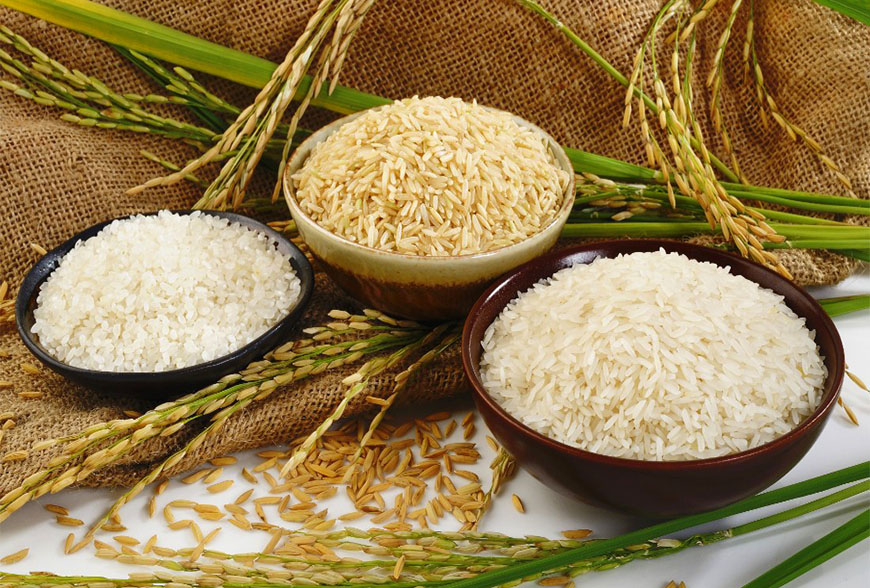

<div style="border-radius:10px; padding: 15px; background-color: #c0e5e9; font-size:115%; text-align:left">
    <h3 align="left"><font color="navy">🍚 Rice Image Classification Project 🍚</font></h3>
    <p style="color:navy;">
        This project focuses on classifying different types of rice grains, including Arborio, Basmati, Jasmine, Ipsala, and Karacadag. 
        By leveraging both custom deep learning models and pretrained architectures (such as AlexNet, ResNet50, VGGNet19, and EfficientNetV2L), 
        we aim to determine the most effective approach for accurate rice variety classification.
        <br><br>
    </p>

</div>

<a id="c_table"></a> 



<div style="border-radius:10px; padding: 15px; background-color: #c0e5e9; font-size:115%; text-align:left">



<h3 align="left"><font color=navy>Table of Contents:</font></h3>

<font color=navy>

        

* [1 | Libraries📚](#lib)
* [2 | Importing Dataset🗄](#data)
* [3 | Dataset Description📖](#datades)
* [4 | Visualizing📈](#Visualizing)
* [5 | Custom Models📊](#custom)
* [6 | AlexNet📊](#Alex)
* [7 | Result📊](#result)

<a id="lib"></a>

# <p style="background-color:powderblue; font-family:roboto; color:navy; font-size:145%;font-weight:bold; text-align:center; border-radius:25px 10px; padding: 10px">1 - Libraries 📚</p>



⬆️ [Table of Contents](#c_table)

In [1]:
!pip install -q mplcyberpunk --upgrade

!pip install -q visualkeras --upgrade

!pip install -q silence_tensorflow --upgrade


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import os

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import tensorflow as tf

from tensorflow import keras

from collections import Counter

import mplcyberpunk

import visualkeras

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

from tensorflow.keras.applications import ResNet50, VGG19, EfficientNetV2L

import silence_tensorflow

import warnings



silence_tensorflow.silence_tensorflow()

warnings.filterwarnings('ignore')

E0000 00:00:1731577942.220255      13 common_lib.cc:798] Could not set metric server port: INVALID_ARGUMENT: Could not find SliceBuilder port 8471 in any of the 0 ports provided in `tpu_process_addresses`="local"
=== Source Location Trace: ===
learning/45eac/tfrc/runtime/common_lib.cc:479
D1114 09:52:22.228623574      13 config.cc:196]                        gRPC EXPERIMENT call_status_override_on_cancellation   OFF (default:OFF)
D1114 09:52:22.228638610      13 config.cc:196]                        gRPC EXPERIMENT call_v3                                OFF (default:OFF)
D1114 09:52:22.228641925      13 config.cc:196]                        gRPC EXPERIMENT canary_client_privacy                  ON  (default:ON)
D1114 09:52:22.228644425      13 config.cc:196]                        gRPC EXPERIMENT capture_base_context                   ON  (default:ON)
D1114 09:52:22.228646765      13 config.cc:196]                        gRPC EXPERIMENT client_idleness                        ON  (defau

<a id="data"></a>

# <p style="background-color:powderblue; font-family:roboto; color:navy; font-size:145%;font-weight:bold; text-align:center; border-radius:25px 10px; padding: 10px">2 - Importing Dataset🗄</p>



⬆️ [Table of Contents](#c_table)

<div style="border-radius:10px; padding: 10px; background-color: #c0e5e9; font-size:115%; text-align:left">
  <font color=navy>
    <p style="color:navy;">
      In this section, we load the rice image dataset from the specified directory and split it into training and validation sets.
      As this project is for educational purposes, a separate test dataset is not created. Instead, the focus is on observing the model's
      performance during training and validation. The process involves the following steps:
    </p>
    <ul>
      <li>Using <strong>image_dataset_from_directory</strong> from TensorFlow Keras to load the images and infer labels automatically.</li>
      <li>Applying a 75-25 split ratio to create training and validation datasets.</li>
      <li>Resizing images to <strong>250x250</strong> pixels for uniformity across the dataset.</li>
      <li>Using a <strong>batch size</strong> of 64 for efficient training.</li>
      <li>Setting a random seed for <strong>reproducibility</strong> of results.</li>
    </ul>

  </font>

</div>


In [3]:
# Load the dataset from the directory

train = keras.utils.image_dataset_from_directory(

    directory = '/kaggle/input/rice-image-dataset/Rice_Image_Dataset/',

    labels = 'inferred',

    label_mode = 'categorical',

    image_size = (250, 250),

    shuffle = True,

    validation_split = 0.25,

    subset = 'training',

    batch_size = 64,

    seed = 42

)



validation = keras.utils.image_dataset_from_directory(

    directory = '/kaggle/input/rice-image-dataset/Rice_Image_Dataset/',

    labels = 'inferred',

    label_mode = 'categorical',

    image_size = (250, 250),

    shuffle = True,

    validation_split = 0.25,

    subset = 'validation',

    batch_size = 64,

    seed = 42

)

Found 75000 files belonging to 5 classes.
Using 56250 files for training.


I0000 00:00:1731577984.544971      13 service.cc:145] XLA service 0x5c5124139550 initialized for platform TPU (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731577984.545029      13 service.cc:153]   StreamExecutor device (0): TPU, 2a886c8
I0000 00:00:1731577984.545034      13 service.cc:153]   StreamExecutor device (1): TPU, 2a886c8
I0000 00:00:1731577984.545037      13 service.cc:153]   StreamExecutor device (2): TPU, 2a886c8
I0000 00:00:1731577984.545041      13 service.cc:153]   StreamExecutor device (3): TPU, 2a886c8
I0000 00:00:1731577984.545044      13 service.cc:153]   StreamExecutor device (4): TPU, 2a886c8
I0000 00:00:1731577984.545047      13 service.cc:153]   StreamExecutor device (5): TPU, 2a886c8
I0000 00:00:1731577984.545049      13 service.cc:153]   StreamExecutor device (6): TPU, 2a886c8
I0000 00:00:1731577984.545052      13 service.cc:153]   StreamExecutor device (7): TPU, 2a886c8


Found 75000 files belonging to 5 classes.
Using 18750 files for validation.


<a id="datades"></a>

# <p style="background-color:powderblue; font-family:roboto; color:navy; font-size:145%;font-weight:bold; text-align:center; border-radius:25px 10px; padding: 10px">3 - Dataset Description📖</p>



⬆️ [Table of Contents](#c_table)

<div style="border-radius:10px; padding: 10px; background-color: #c0e5e9; font-size:115%; text-align:left">
  <font color=navy>
    <p style="color:navy;">
      In this step, we analyze the distribution of samples across different categories in the training and validation datasets. 
      This helps us understand the class balance before proceeding with model training. The analysis involves the following steps:
    </p>
    <ul>
      <li>Initializing a <strong>counter</strong> to track the number of samples for each class in both training and validation sets.</li>
      <li>Iterating through the dataset batches and converting the <strong>one-hot encoded labels</strong> back to class indices.</li>
      <li>Counting and printing the number of samples for each rice variety (category) in the training and validation datasets.</li>
      <li>Calculating the <strong>total count</strong> of samples across both datasets to check overall class distribution.</li>
      <li>Displaying the shape of a batch of images and labels to verify the data structure and inspect sample values.</li>
    </ul>

  </font>

</div>


In [4]:
# Initialize a counter to keep track of the labels

train_label_counts = Counter()



# Loop through the batches in the dataset

for images, labels in train:

    # Convert the one-hot encoded labels back to the class indices

    class_indices = np.argmax(labels, axis=1)

    train_label_counts.update(class_indices)



# Print the count for each category

for label, count in train_label_counts.items():

    print(f"Category {train.class_names[label]} in training : {count} samples")

Category Arborio in training : 11249 samples
Category Basmati in training : 11090 samples
Category Jasmine in training : 11270 samples
Category Ipsala in training : 11386 samples
Category Karacadag in training : 11255 samples


In [5]:
# Initialize a counter to keep track of the labels

validation_label_counts = Counter()



# Loop through the batches in the dataset

for images, labels in validation:

    # Convert the one-hot encoded labels back to the class indices

    class_indices = np.argmax(labels, axis=1)

    validation_label_counts.update(class_indices)



# Print the count for each category

for label, count in validation_label_counts.items():

    print(f"Category {train.class_names[label]} in validation : {count} samples")

Category Basmati in validation : 3910 samples
Category Jasmine in validation : 3730 samples
Category Ipsala in validation : 3614 samples
Category Arborio in validation : 3751 samples
Category Karacadag in validation : 3745 samples


In [6]:
total_counts = train_label_counts + validation_label_counts

print('Total count of categories : ', total_counts)

Total count of categories :  Counter({0: 15000, 1: 15000, 3: 15000, 2: 15000, 4: 15000})


In [7]:
for images, labels in train.take(1):

    print("Batch shape:", images.shape)

    print("Label shape:", labels.shape)

    print("Label sample (one-hot encoded):", labels[0])

Batch shape: (64, 250, 250, 3)
Label shape: (64, 5)
Label sample (one-hot encoded): tf.Tensor([0. 0. 0. 0. 1.], shape=(5,), dtype=float32)


In [8]:
tf.reduce_max(images[1]).numpy()

255.0

<a id="Visualizing"></a>

# <p style="background-color:powderblue; font-family:roboto; color:navy; font-size:145%;font-weight:bold; text-align:center; border-radius:25px 10px; padding: 10px">4 - Visualizing📈</p>



⬆️ [Table of Contents](#c_table)

<div style="border-radius:10px; padding: 10px; background-color: #c0e5e9; font-size:115%; text-align:left">
  <font color=navy>
    <p style="color:navy;">
      To gain a better understanding of the dataset's distribution, we visualize the sample counts for each rice variety along with representative images. 
      This helps in identifying any class imbalances and provides a visual overview of the dataset.
    </p>

  </font>

</div>


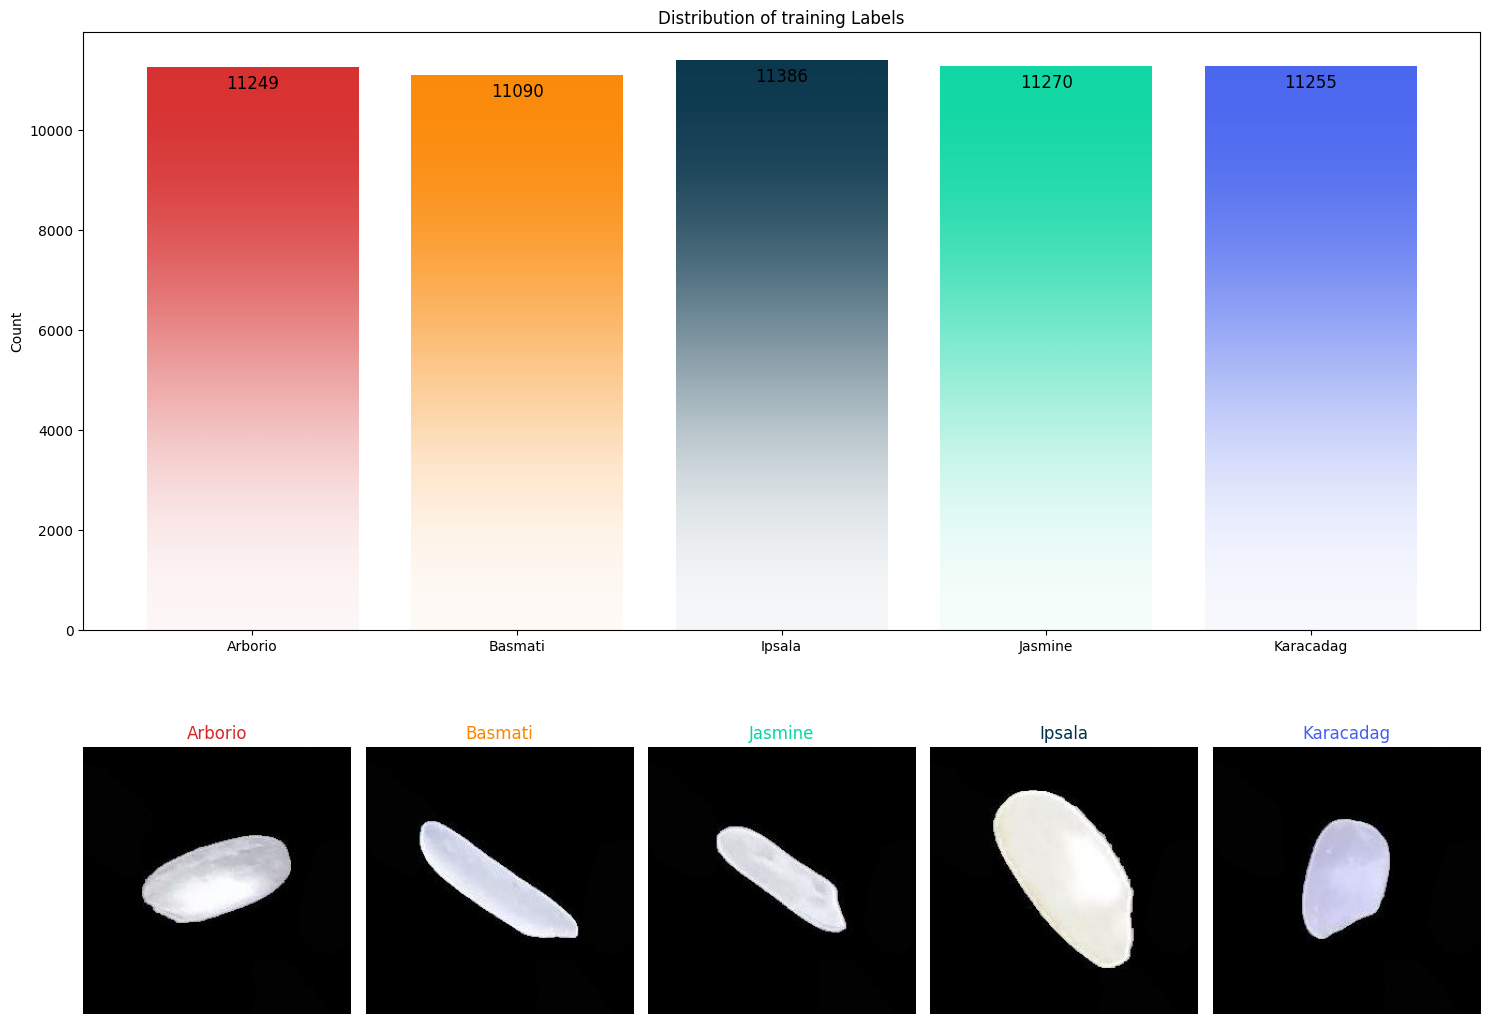

In [9]:
# Define custom colors

custom_colors = ['#d62828', '#fb8500', '#06d6a0', '#023047', '#4361ee']



# Plot the bar plot and sample images in one chart

plt.figure(figsize=(15, 12))



# Plot the histogram

plt.subplot(2, 1, 1)

bars = plt.bar(train_label_counts.keys(), train_label_counts.values(), color=custom_colors)

mplcyberpunk.add_bar_gradient(bars=bars)



# Annotate each bar with its count

for i, bar in enumerate(bars):

    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 500, 

             f'{int(bar.get_height())}', ha='center', va='bottom', fontsize=12)



# Labeling the x-axis with class names

plt.xticks(ticks=list(train_label_counts.keys()), labels=[train.class_names[i] for i in train_label_counts.keys()])

plt.ylabel('Count')

plt.title('Distribution of training Labels')



# Plot sample images from each label

num_classes = len(train.class_names)

for k, label in enumerate(train_label_counts.keys()):

    plt.subplot(2, num_classes, num_classes + k + 1)



    # Extract a sample image for this class label

    found = False

    for images, labels in train:

        for j in range(len(labels)):

            if np.argmax(labels[j]) == label:

                plt.imshow(images[j].numpy().astype('uint8'))

                plt.title(train.class_names[label], color=custom_colors[k])

                plt.axis('off')

                found = True

                break

        if found:

            break



plt.tight_layout()

plt.show()

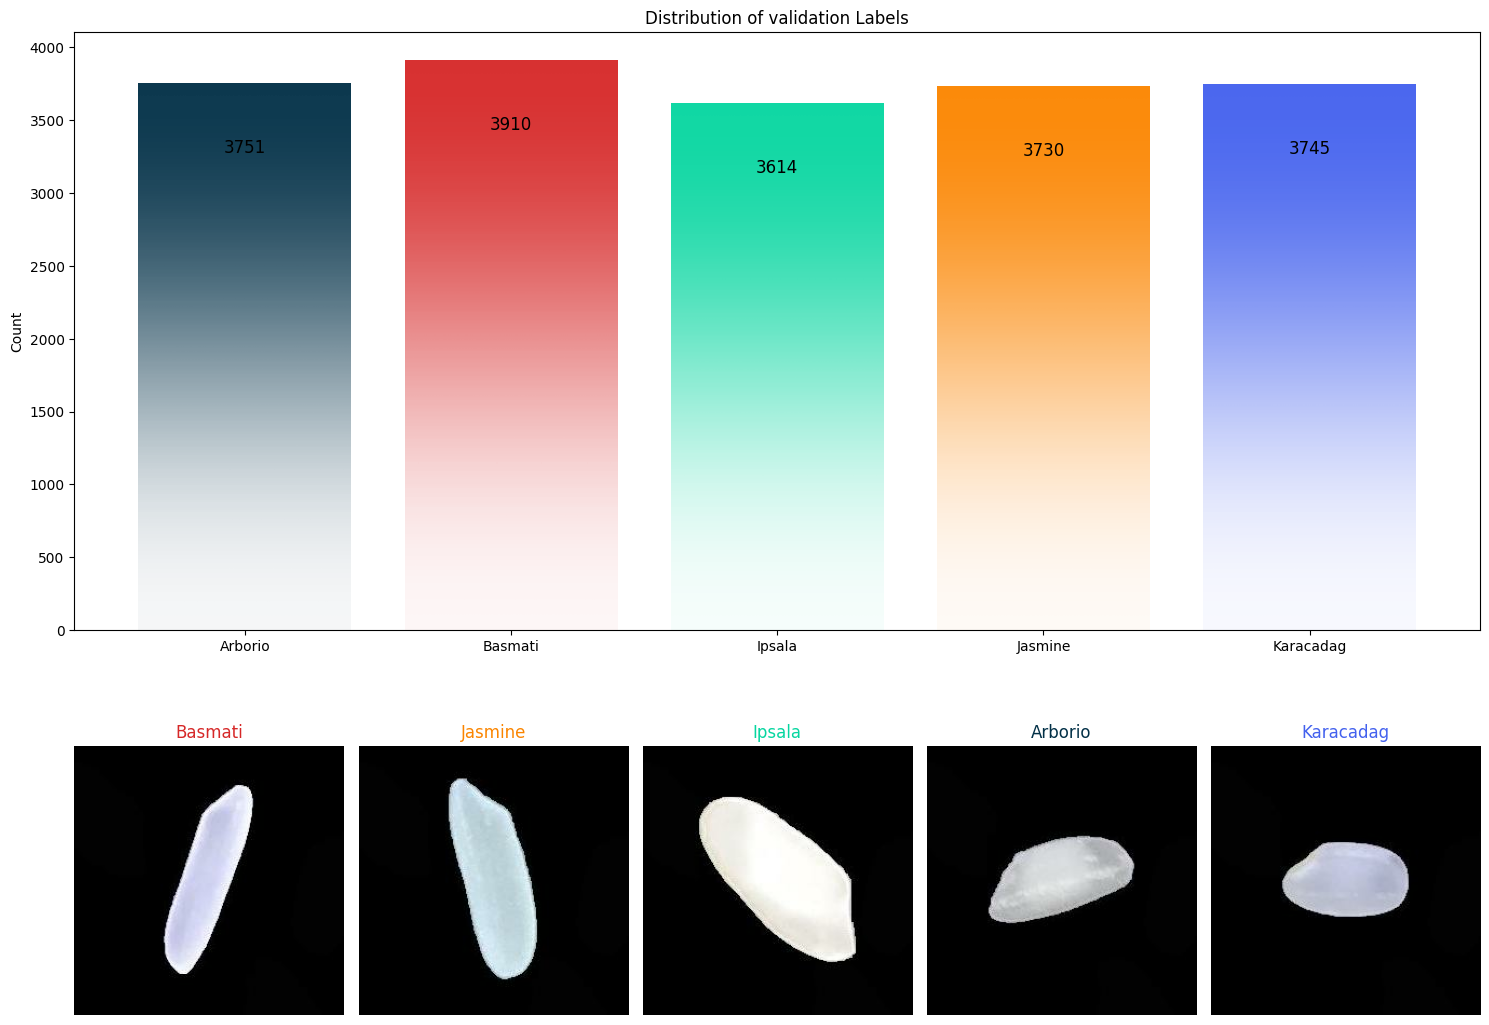

In [10]:
# Define custom colors

custom_colors = ['#d62828', '#fb8500', '#06d6a0', '#023047', '#4361ee']



# Plot the bar plot and sample images in one chart

plt.figure(figsize=(15, 12))



# Plot the histogram

plt.subplot(2, 1, 1)

bars = plt.bar(validation_label_counts.keys(), validation_label_counts.values(), color=custom_colors)

mplcyberpunk.add_bar_gradient(bars=bars)



# Annotate each bar with its count

for i, bar in enumerate(bars):

    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 500, 

             f'{int(bar.get_height())}', ha='center', va='bottom', fontsize=12)



# Labeling the x-axis with class names

plt.xticks(ticks=list(validation_label_counts.keys()), labels=[train.class_names[i] for i in validation_label_counts.keys()])

plt.ylabel('Count')

plt.title('Distribution of validation Labels')



# Plot sample images from each label

num_classes = len(train.class_names)

for k, label in enumerate(validation_label_counts.keys()):

    plt.subplot(2, num_classes, num_classes + k + 1)



    # Extract a sample image for this class label

    found = False

    for images, labels in train:

        for j in range(len(labels)):

            if np.argmax(labels[j]) == label:

                plt.imshow(images[j].numpy().astype('uint8'))

                plt.title(train.class_names[label], color=custom_colors[k])

                plt.axis('off')

                found = True

                break

        if found:

            break



plt.tight_layout()

plt.show()

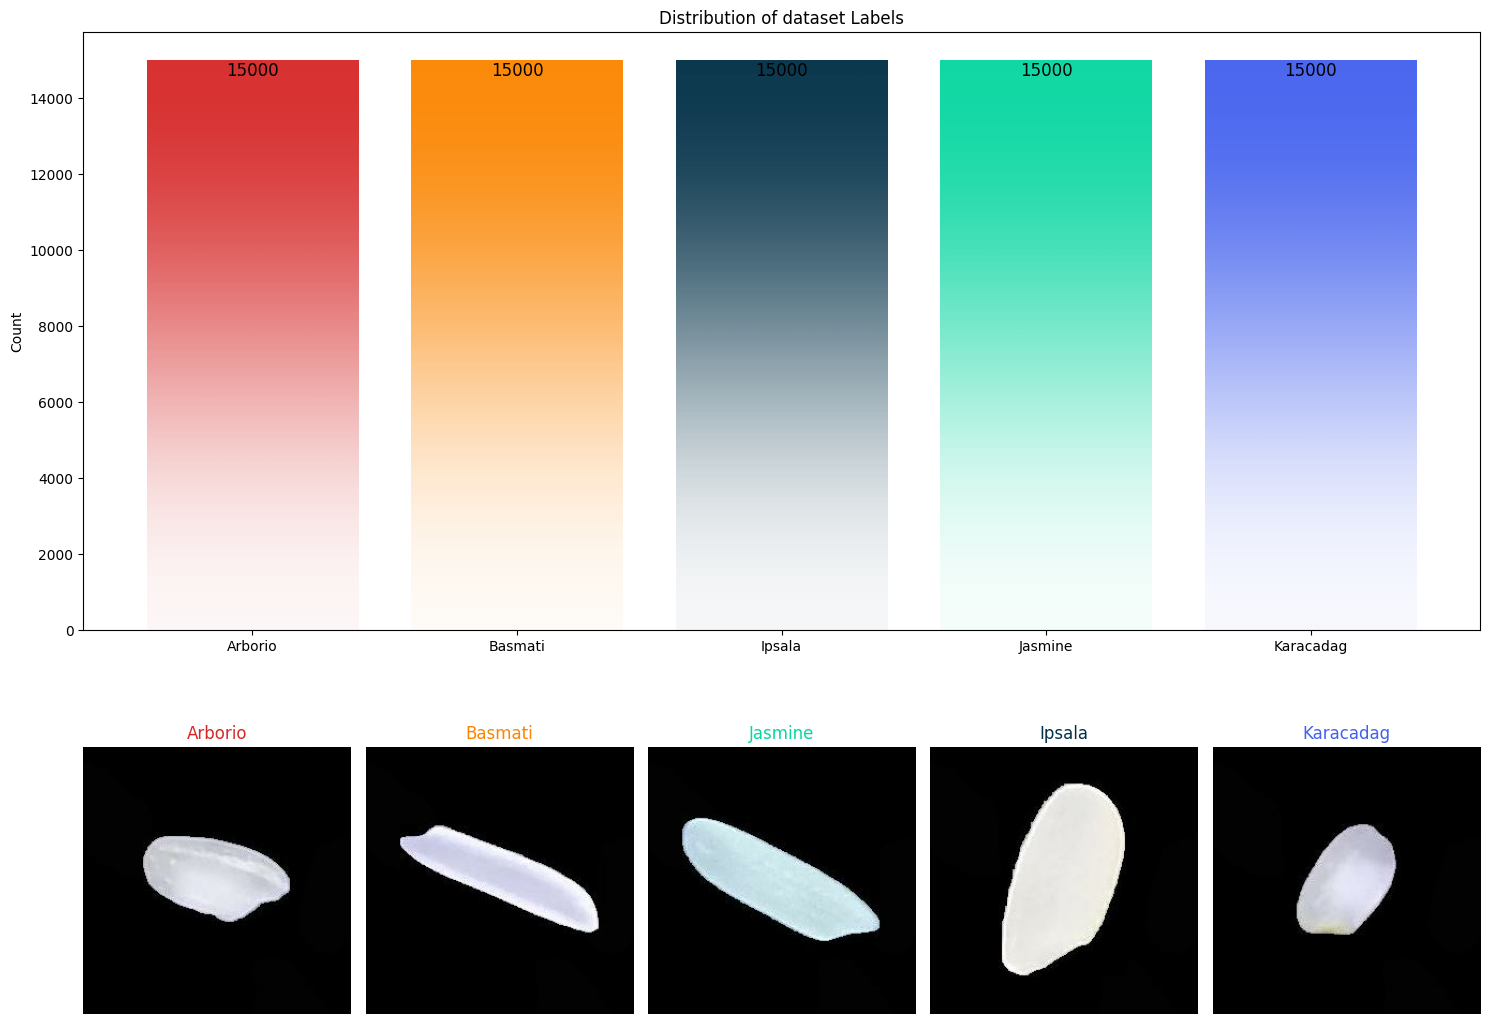

In [11]:
# Define custom colors

custom_colors = ['#d62828', '#fb8500', '#06d6a0', '#023047', '#4361ee']



# Plot the bar plot and sample images in one chart

plt.figure(figsize=(15, 12))



# Plot the histogram

plt.subplot(2, 1, 1)

bars = plt.bar(total_counts.keys(), total_counts.values(), color=custom_colors)

mplcyberpunk.add_bar_gradient(bars=bars)



# Annotate each bar with its count

for i, bar in enumerate(bars):

    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 500, 

             f'{int(bar.get_height())}', ha='center', va='bottom', fontsize=12)



# Labeling the x-axis with class names

plt.xticks(ticks=list(total_counts.keys()), labels=[train.class_names[i] for i in total_counts.keys()])

plt.ylabel('Count')

plt.title('Distribution of dataset Labels')



# Plot sample images from each label

num_classes = len(train.class_names)

for k, label in enumerate(total_counts.keys()):

    plt.subplot(2, num_classes, num_classes + k + 1)



    # Extract a sample image for this class label

    found = False

    for images, labels in train:

        for j in range(len(labels)):

            if np.argmax(labels[j]) == label:

                plt.imshow(images[j].numpy().astype('uint8'))

                plt.title(train.class_names[label], color=custom_colors[k])

                plt.axis('off')

                found = True

                break

        if found:

            break



plt.tight_layout()

plt.show()

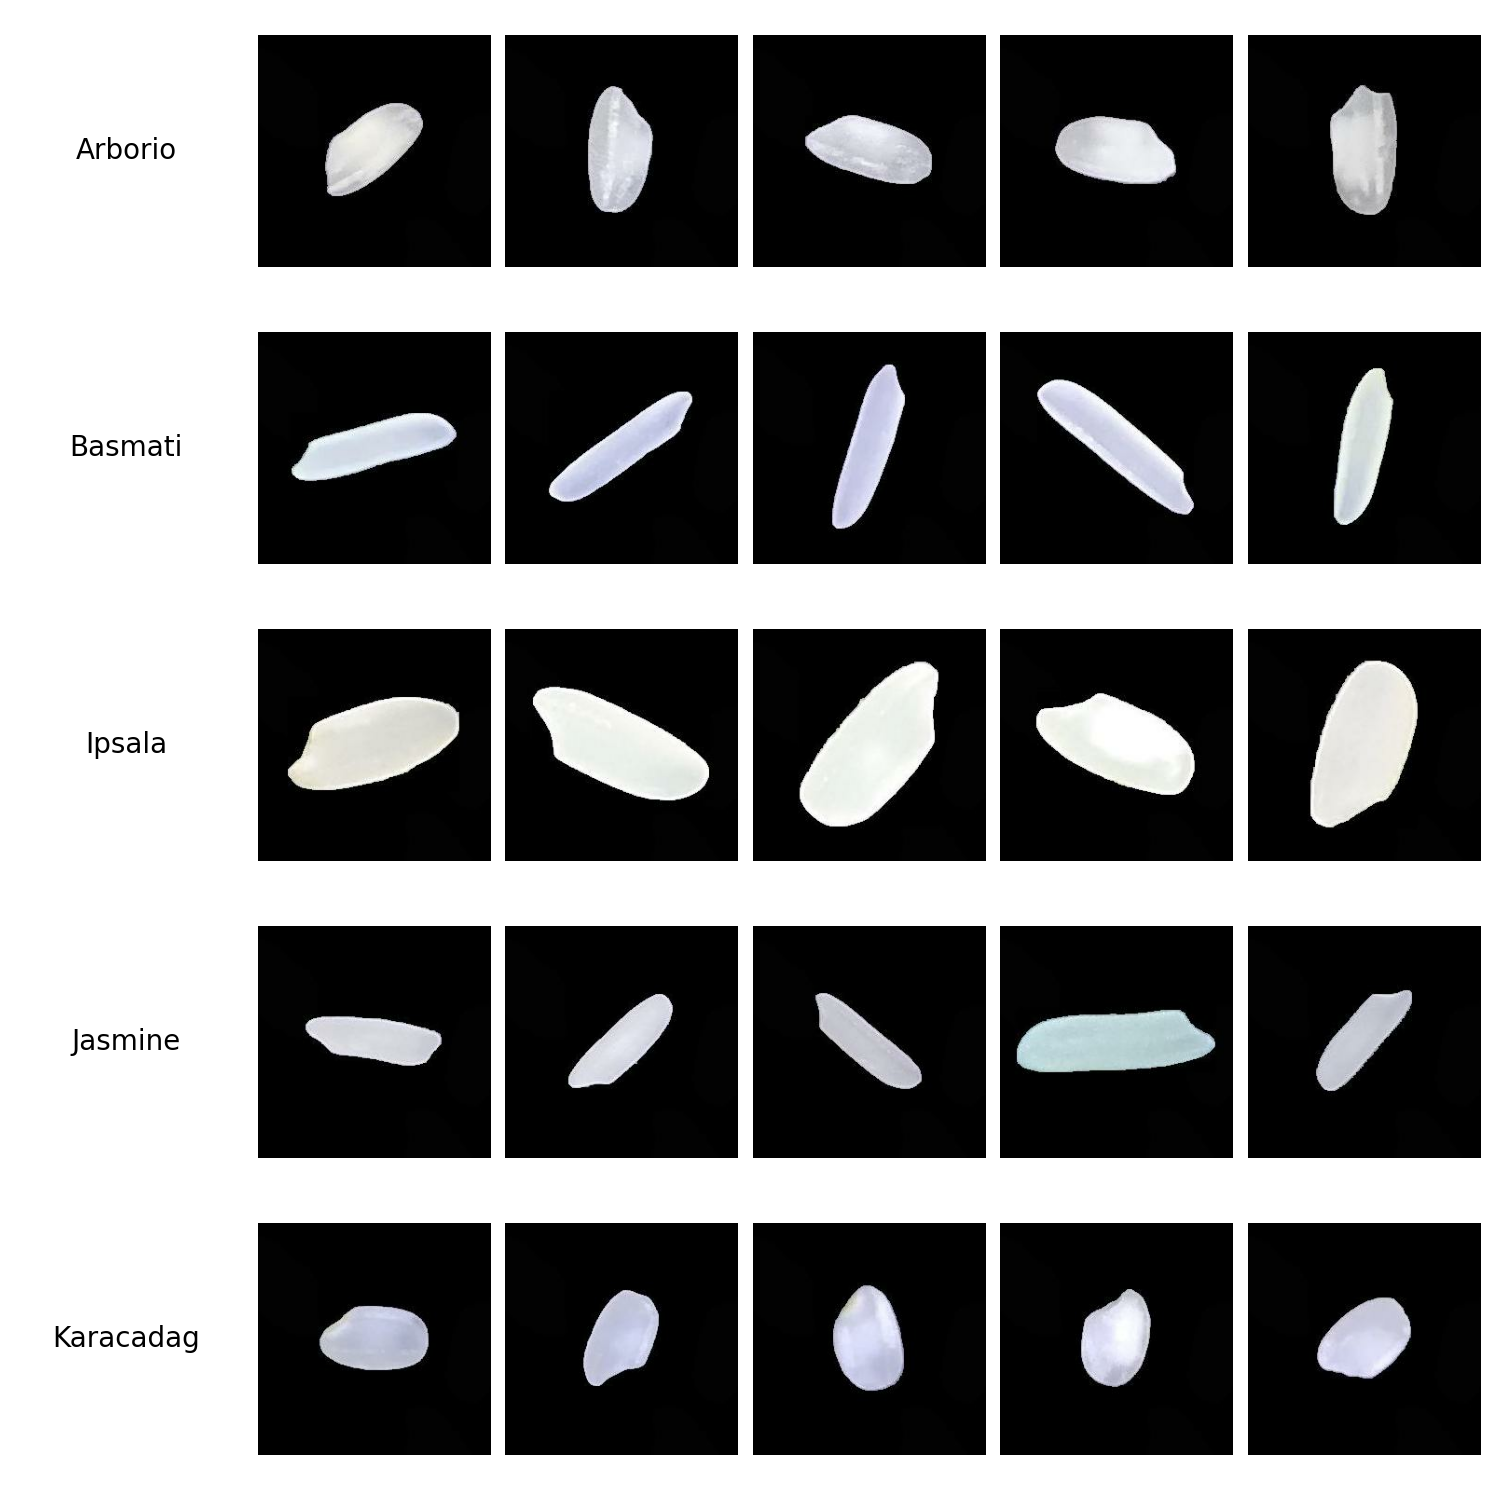

In [12]:
plt.figure(figsize=(15, len(train.class_names) * 3))



for class_index, class_name in enumerate(train.class_names):

    count = 0

    for images, labels in train:

        for i in range(len(labels)):

            if tf.argmax(labels[i]).numpy() == class_index:

                if count == 0:

                    plt.subplot(len(train.class_names), 6, class_index * 6 + 1)

                    plt.text(0.5, 0.5, class_name, ha='center', va='center', fontsize=20)

                    plt.axis("off")



                plt.subplot(len(train.class_names), 6, class_index * 6 + count + 2)

                plt.imshow(images[i].numpy().astype("uint8"))

                plt.axis("off")

                

                count += 1

                if count == 5:

                    break

        if count == 5:

            break



plt.tight_layout()

plt.show()

<a id="custom"></a>

# <p style="background-color:powderblue; font-family:roboto; color:navy; font-size:145%;font-weight:bold; text-align:center; border-radius:25px 10px; padding: 10px">5 - Custom Models📊</p>



⬆️ [Table of Contents](#c_table)

<div style="border-radius:10px; padding: 10px; background-color: #c0e5e9; font-size:115%; text-align:left">

  <font color=navy>
    <p style="color:navy;">
      We define three custom convolutional neural network (CNN) models with increasing complexity to classify rice images into five distinct varieties. 
      Each model follows a sequential architecture and includes the following components:
    </p>
    <ul>
      <li><strong>Model 1:</strong> A simple architecture with a single convolutional layer (64 filters), followed by max pooling, flattening, and two dense layers. This lightweight model serves as a baseline.</li>
      <li><strong>Model 2:</strong> An enhanced version with an additional convolutional layer (128 and 64 filters). This deeper architecture aims to capture more complex patterns in the images.</li>
      <li><strong>Model 3:</strong> The most advanced model, incorporating batch normalization for improved training stability. It includes two convolutional layers (128 and 64 filters) and an increased number of dense units to enhance feature extraction capabilities.</li>
    </ul>
    <p style="color:navy;">
      All models use ReLU activation for hidden layers and softmax activation for the output layer to handle multi-class classification. The input images are rescaled to normalize pixel values between 0 and 1, aiding in faster convergence during training.
    </p>

  </font>

</div>


In [13]:
# detect and init the TPU
tpu = tf.distribute.cluster_resolver.TPUClusterResolver()

# instantiate a distribution strategy
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.TPUStrategy(tpu)

print("Number of accelerators:", tpu_strategy.num_replicas_in_sync)

Number of accelerators: 8


In [14]:
# Model parameters

num_classes = 5

input_shape = (250, 250, 3)


# instantiating the model in the strategy scope creates the model on the TPU
with tpu_strategy.scope():
    model = keras.Sequential(

    [

        keras.layers.Input(shape=input_shape),

        keras.layers.Rescaling(1./255),

        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),

        keras.layers.MaxPooling2D(pool_size=(2, 2)),

        keras.layers.Flatten(),

        keras.layers.Dense(units = 32, activation = 'relu'),

        keras.layers.Dense(num_classes, activation="softmax"),

    ]

    )
    model.compile(

    loss=keras.losses.CategoricalCrossentropy(),

    optimizer=keras.optimizers.Adam(learning_rate=1e-3),

    metrics=[keras.metrics.CategoricalAccuracy(name="accuracy")]

    )

I0000 00:00:1731578015.124087      13 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 250, 250, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 248, 248, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 124, 124, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 984064)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │    31,490,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,492,037 (120.13 MB)

 Trainable params: 31,492,037 (120.13 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
tf.keras.utils.plot_model(

    model,

    show_shapes=True,

    show_dtype=False,

    show_layer_names=False,

    show_layer_activations=True,

    dpi=100

)

You must install pydot (`pip install pydot`) for `plot_model` to work.


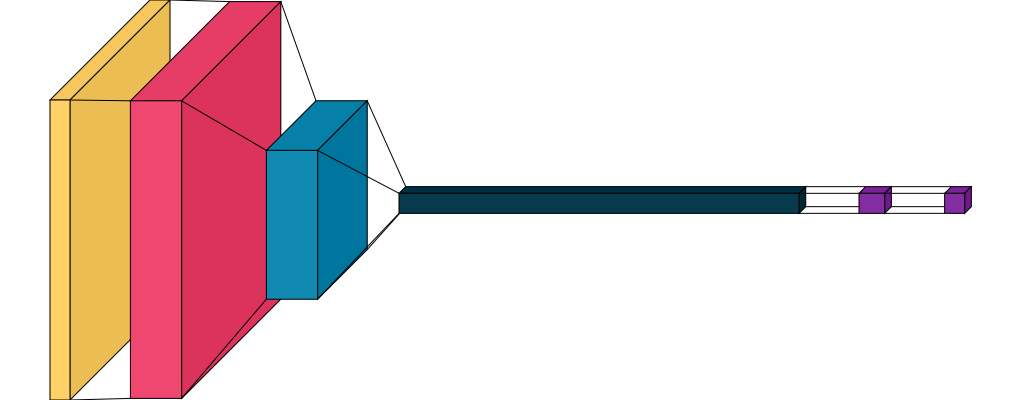

In [17]:
visualkeras.layered_view(

    model,

    draw_volume=True,

    scale_xy=1.2,

    scale_z=0.8,

    spacing=60,

    padding=50

)

In [18]:
# train model normally
model.fit(

    train,

    validation_data=validation,

    batch_size=64,

    epochs=15

)

Epoch 1/15


2024-11-14 09:53:43.875741: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node StatefulPartitionedCall.
I0000 00:00:1731578024.202078     952 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(3d4062075c1b82f7:0:0), session_name()


  2/879 ━━━━━━━━━━━━━━━━━━━━ 1:08 78ms/step - accuracy: 0.2188 - loss: 5.1757 

I0000 00:00:1731578027.038889     952 tpu_compile_op_common.cc:245] Compilation of 3d4062075c1b82f7:0:0 with session name  took 2.836760611s and succeeded
I0000 00:00:1731578027.044636     952 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(3d4062075c1b82f7:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_11893729619053888555", property.function_library_fingerprint = 16236319992095147003, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "8,250,250,3,;8,5,;", property.guaranteed_constants_size = 0, embedding_partitions_fingerprint = "1688352644216761960")
I0000 00:00:1731578027.044682     952 tpu_compilation_cache_interface.cc:541] After adding entry for key 

878/879 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9180 - loss: 0.4295

I0000 00:00:1731578066.658856     902 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(b9fc6484286751f5:0:0), session_name()
I0000 00:00:1731578067.601374     902 tpu_compile_op_common.cc:245] Compilation of b9fc6484286751f5:0:0 with session name  took 942.445112ms and succeeded
I0000 00:00:1731578067.603167     902 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(b9fc6484286751f5:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_3556195806987462844", property.function_library_fingerprint = 8956459482980432278, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "8,250,250,3,;8,5,;", property.guaranteed_constants_size = 0, embedd

879/879 ━━━━━━━━━━━━━━━━━━━━ 53s 56ms/step - accuracy: 0.9181 - loss: 0.4288 - val_accuracy: 0.9919 - val_loss: 0.0254
Epoch 2/15
879/879 ━━━━━━━━━━━━━━━━━━━━ 47s 53ms/step - accuracy: 0.9938 - loss: 0.0213 - val_accuracy: 0.9659 - val_loss: 0.0981
Epoch 3/15
879/879 ━━━━━━━━━━━━━━━━━━━━ 48s 54ms/step - accuracy: 0.9881 - loss: 0.0325 - val_accuracy: 0.9893 - val_loss: 0.0558
Epoch 4/15
879/879 ━━━━━━━━━━━━━━━━━━━━ 47s 53ms/step - accuracy: 0.9938 - loss: 0.0174 - val_accuracy: 0.9919 - val_loss: 0.0256
Epoch 5/15
879/879 ━━━━━━━━━━━━━━━━━━━━ 48s 54ms/step - accuracy: 0.9978 - loss: 0.0075 - val_accuracy: 0.9846 - val_loss: 0.0446
Epoch 6/15
879/879 ━━━━━━━━━━━━━━━━━━━━ 47s 53ms/step - accuracy: 0.9955 - loss: 0.0139 - val_accuracy: 0.9855 - val_loss: 0.0489
Epoch 7/15
879/879 ━━━━━━━━━━━━━━━━━━━━ 47s 53ms/step - accuracy: 0.9967 - loss: 0.0088 - val_accuracy: 0.9923 - val_loss: 0.0431
Epoch 8/15
879/879 ━━━━━━━━━━━━━━━━━━━━ 47s 53ms/step - accuracy: 0.9998 - loss: 0.0014 - val_accurac

In [19]:
# Retrieve training history

history_of_model_1 = model.history.history

In [20]:
def accuracy_plot(history):

    # Set Seaborn theme once

    sns.set_theme(style='darkgrid')



    # Create a DataFrame for accuracy (using NumPy for efficient range generation)

    epochs = np.arange(1, len(history['accuracy']) + 1)

    accuracy_data = pd.DataFrame({

        'Epoch': np.tile(epochs, 2),

        'Accuracy': history['accuracy'] + history['val_accuracy'],

        'Type': ['Training Accuracy'] * len(history['accuracy']) + ['Validation Accuracy'] * len(history['val_accuracy'])

    })



    # Plot Accuracy

    plt.figure(figsize=(15, 8))

    sns.lineplot(x='Epoch', y='Accuracy', hue='Type', style='Type', markers=True, data=accuracy_data)

    plt.title('Model Accuracy')

    plt.xlabel('Epoch')

    plt.ylabel('Accuracy')

    plt.legend(title='')

    plt.grid(True)

    plt.show()

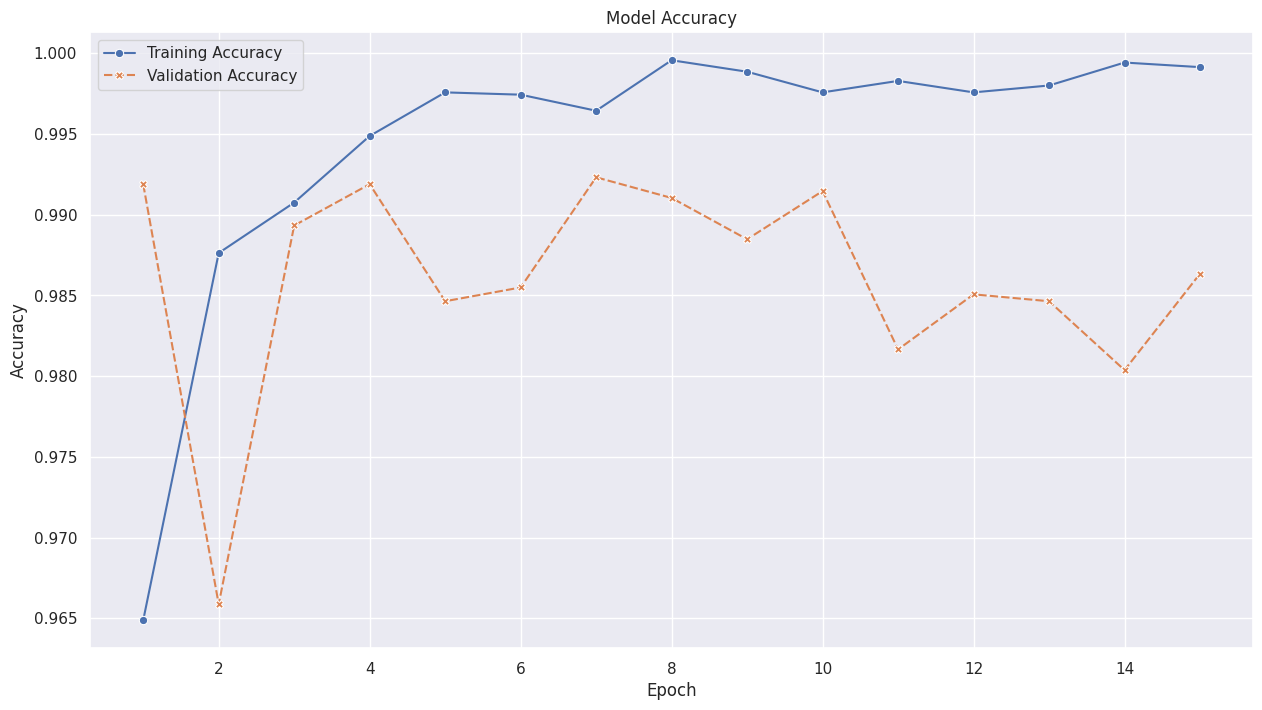

In [21]:
accuracy_plot(history_of_model_1)

In [22]:
def loss_plot(history):

    # Set Seaborn theme once

    sns.set_theme(style='darkgrid')



    # Create a DataFrame for loss (using NumPy for efficient range generation)

    epochs = np.arange(1, len(history['loss']) + 1)

    loss_data = pd.DataFrame({

        'Epoch': np.tile(epochs, 2),

        'Loss': history['loss'] + history['val_loss'],

        'Type': ['Training Loss'] * len(history['loss']) + ['Validation Loss'] * len(history['val_loss'])

    })



    # Plot Loss

    plt.figure(figsize=(15, 8))

    sns.lineplot(x='Epoch', y='Loss', hue='Type', style='Type', markers=True, data=loss_data)

    plt.title('Model Loss')

    plt.xlabel('Epoch')

    plt.ylabel('Loss')

    plt.legend(title='')

    plt.grid(True)

    plt.show()

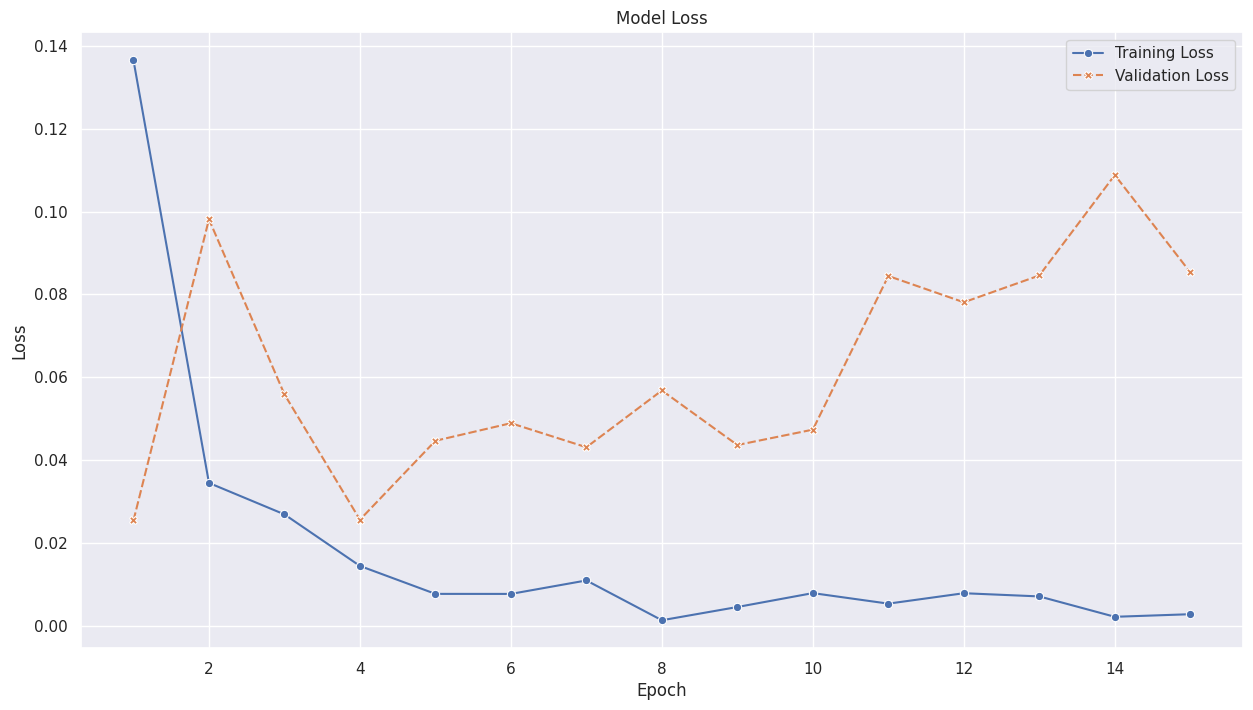

In [23]:
loss_plot(history_of_model_1)


Metrics :


Accuracy  Precision    Recall  F1_Score
Custom Model 1  0.986933   0.987064  0.986986   0.98702

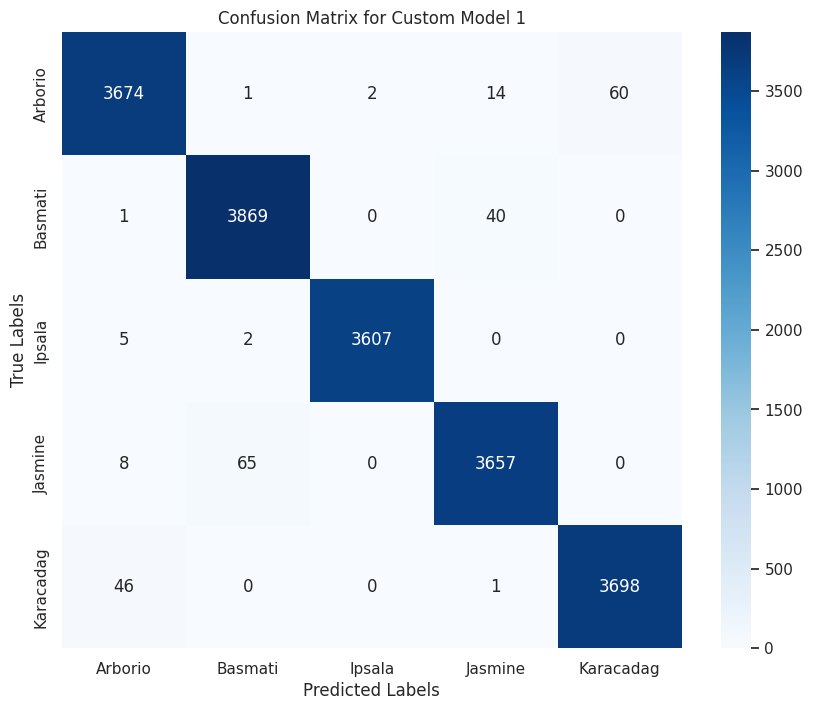

In [24]:
metrics_df = pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1_Score"])

def evaluate_model(model, model_name, validation_data, metrics_df, strategy):

    # Initialize the arrays to store true and predicted labels
    all_true_labels = []
    all_predicted_labels = []

    # Iterate over the validation dataset in batches
    for images, labels in validation_data:
        
        # Extract true labels (convert one-hot encoding to class indices)
        true_labels = np.argmax(labels.numpy(), axis=1)
        all_true_labels.append(true_labels)

        # Perform predictions directly using the model within the strategy scope
        with strategy.scope():
            predicted_logits = model(images, training=False)
            predicted_classes = np.argmax(predicted_logits.numpy(), axis=1)
        
        all_predicted_labels.append(predicted_classes)

    # Convert lists of true and predicted labels to NumPy arrays
    y_true = np.concatenate(all_true_labels, axis=0)
    y_pred = np.concatenate(all_predicted_labels, axis=0)

    # Compute metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_true, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)

    # Store metrics in the DataFrame
    metrics_df.loc[model_name] = [accuracy, precision, recall, f1]

    # Display the metrics DataFrame
    print(f"\nMetrics :")
    display(metrics_df)

    # Compute and plot the confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=validation_data.class_names,
                yticklabels=validation_data.class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

    return metrics_df

# Use the evaluate_model function
metrics_df = evaluate_model(model, "Custom Model 1", validation, metrics_df, tpu_strategy)

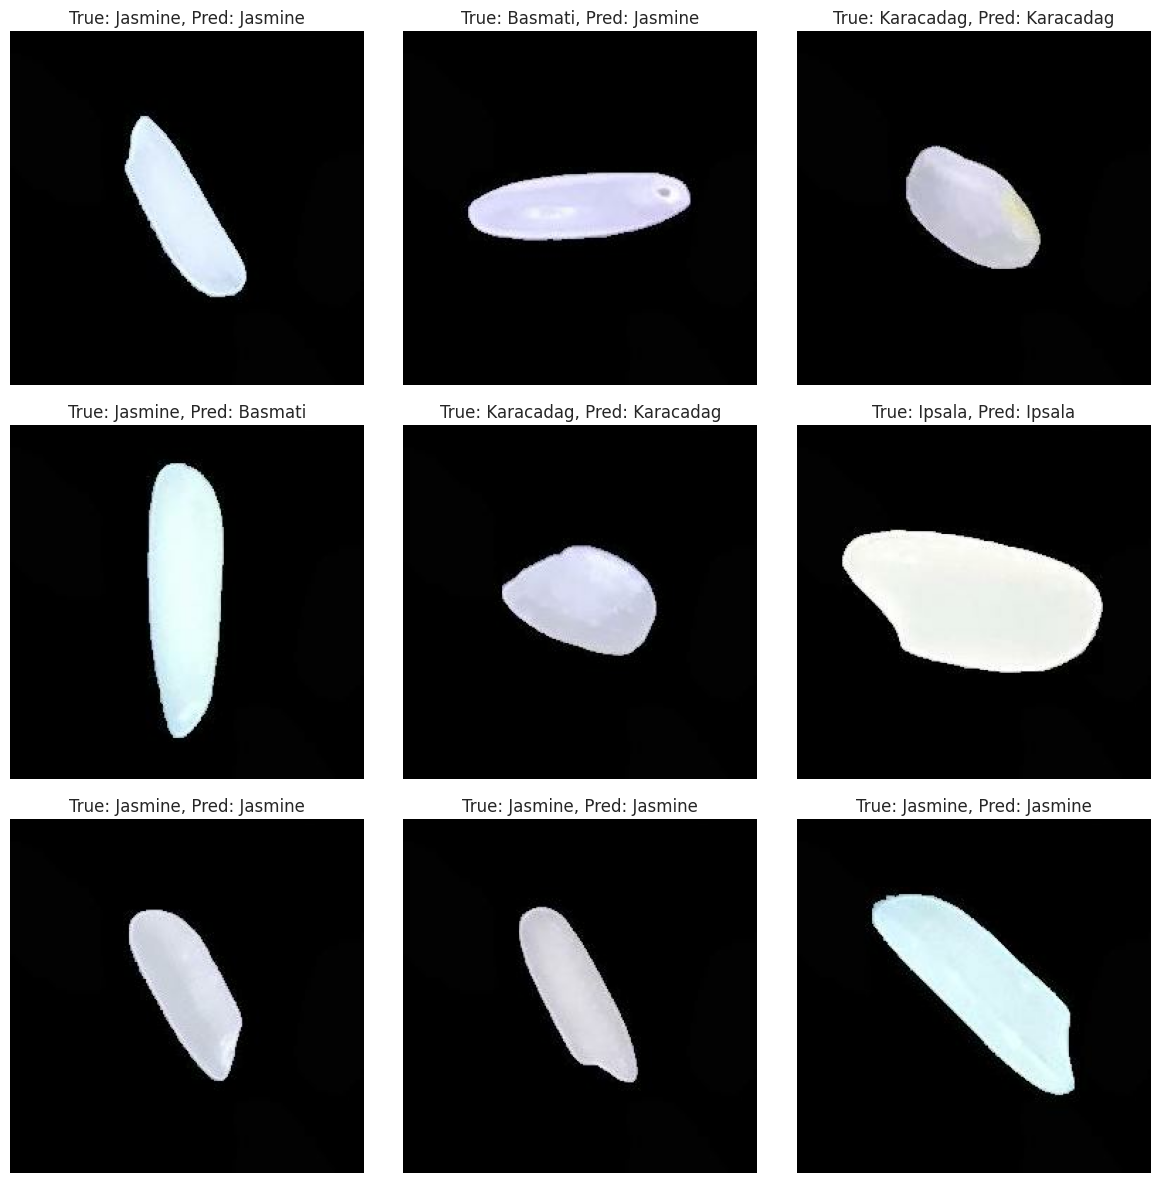

In [25]:
# Get a batch of validation data
x_batch, y_batch = next(iter(validation))

# Make predictions within TPU strategy scope
with tpu_strategy.scope():
    y_pred_batch = model(x_batch, training=False)

# Convert predictions to label indices
y_pred_labels = np.argmax(y_pred_batch.numpy(), axis=1)
y_true_labels = np.argmax(y_batch.numpy(), axis=1)

# Display sample predictions
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_batch[i].numpy().astype("uint8"))
    
    true_label = validation.class_names[y_true_labels[i]]
    pred_label = validation.class_names[y_pred_labels[i]]
    
    plt.title(f"True: {true_label}, Pred: {pred_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 10px; background-color: #c0e5e9; font-size:115%; text-align:left">

  <font color=navy>
    <p style="color:navy;">
      The first custom model shows promising performance with high training and validation accuracy, especially in the initial epochs. 
      Here are some key observations:
    </p>
    <ul>
      <li><strong>High Initial Accuracy:</strong> The model quickly achieves over 90% training accuracy in the first epoch and reaches nearly 99.95% by the 15th epoch, indicating effective learning of patterns in the data.</li>
      <li><strong>Validation Accuracy:</strong> The validation accuracy also remains high, stabilizing around 98-99%. This suggests that the model generalizes well to unseen data, though there is a slight decline in the final epochs.</li>
      <li><strong>Loss Analysis:</strong> While the training loss decreases consistently, the validation loss begins to increase after the 5th epoch. This divergence between training and validation loss is a sign of potential overfitting.</li>
      <li><strong>Overfitting:</strong> Given the increasing validation loss despite high accuracy, the model may be memorizing the training data rather than learning general features. Techniques like regularization, dropout, or early stopping could help mitigate this issue.</li>
    </ul>
    <p style="color:navy;">
      Overall, the model performs well but shows signs of overfitting as training progresses, indicating the need for optimization in future iterations.
    </p>

  </font>

</div>


In [26]:
# Model parameters

num_classes = 5

input_shape = (250, 250, 3)


with tpu_strategy.scope():
    model2 = keras.Sequential(

        [

            keras.layers.Input(shape=input_shape),

            keras.layers.Rescaling(1./255),

            keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),

            keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
            keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),

            keras.layers.MaxPooling2D(pool_size=(2, 2)),

            keras.layers.Flatten(),

            keras.layers.Dense(units = 32, activation = 'relu'),

            keras.layers.Dense(num_classes, activation="softmax"),

        ]

    )
    model2.compile(

    loss=keras.losses.CategoricalCrossentropy(),

    optimizer=keras.optimizers.Adam(learning_rate=1e-3),

    metrics=[keras.metrics.CategoricalAccuracy(name="accuracy")]

    )

In [27]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 250, 250, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 248, 248, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 124, 124, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 122, 122, 64)   │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 238144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │     7,620,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,698,181 (29.37 MB)

 Trainable params: 7,698,181 (29.37 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
tf.keras.utils.plot_model(

    model2,

    show_shapes=True,

    show_dtype=False,

    show_layer_names=False,

    show_layer_activations=True,

    dpi=100

)

You must install pydot (`pip install pydot`) for `plot_model` to work.


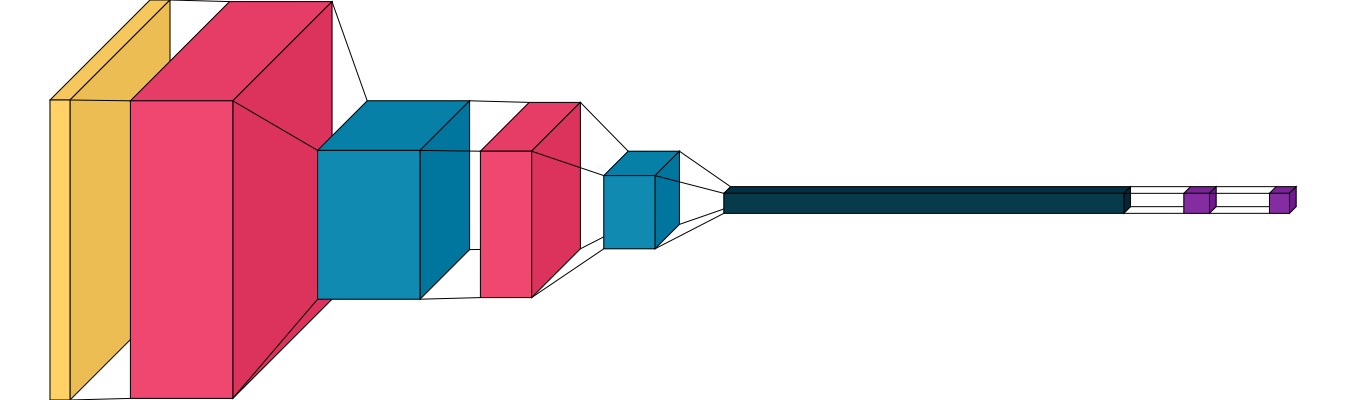

In [29]:
visualkeras.layered_view(

    model2,

    draw_volume=True,

    scale_xy=1.2,

    scale_z=0.8,

    spacing=60,

    padding=50

)

In [30]:
model2.fit(

    train,

    validation_data=validation,

    batch_size=64,

    epochs=15

)

Epoch 1/15


2024-11-14 10:09:54.568397: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node StatefulPartitionedCall.
I0000 00:00:1731578994.831517     859 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(50c44b90ecc1503:0:0), session_name()


  5/879 ━━━━━━━━━━━━━━━━━━━━ 31s 37ms/step - accuracy: 0.2763 - loss: 1.8147

I0000 00:00:1731578999.213715     859 tpu_compile_op_common.cc:245] Compilation of 50c44b90ecc1503:0:0 with session name  took 4.382133619s and succeeded
I0000 00:00:1731578999.216970     859 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(50c44b90ecc1503:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_2476160106025621679", property.function_library_fingerprint = 14692452478589499827, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "8,250,250,3,;8,5,;", property.guaranteed_constants_size = 0, embedding_partitions_fingerprint = "1688352644216761960")
I0000 00:00:1731578999.216997     859 tpu_compilation_cache_interface.cc:541] After adding entry for key 50c

878/879 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9146 - loss: 0.2359

I0000 00:00:1731579034.866035     881 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(e6ec44bb408a21c1:0:0), session_name()
I0000 00:00:1731579038.605066     881 tpu_compile_op_common.cc:245] Compilation of e6ec44bb408a21c1:0:0 with session name  took 3.738977014s and succeeded
I0000 00:00:1731579038.606447     881 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(e6ec44bb408a21c1:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_11702125261950063216", property.function_library_fingerprint = 2750329507471730889, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "8,250,250,3,;8,5,;", property.guaranteed_constants_size = 0, embed

879/879 ━━━━━━━━━━━━━━━━━━━━ 54s 54ms/step - accuracy: 0.9147 - loss: 0.2357 - val_accuracy: 0.9650 - val_loss: 0.1078
Epoch 2/15
879/879 ━━━━━━━━━━━━━━━━━━━━ 43s 48ms/step - accuracy: 0.9759 - loss: 0.0662 - val_accuracy: 0.9881 - val_loss: 0.0410
Epoch 3/15
879/879 ━━━━━━━━━━━━━━━━━━━━ 43s 49ms/step - accuracy: 0.9873 - loss: 0.0391 - val_accuracy: 0.9881 - val_loss: 0.0427
Epoch 4/15
879/879 ━━━━━━━━━━━━━━━━━━━━ 43s 49ms/step - accuracy: 0.9908 - loss: 0.0271 - val_accuracy: 0.9923 - val_loss: 0.0225
Epoch 5/15
879/879 ━━━━━━━━━━━━━━━━━━━━ 43s 49ms/step - accuracy: 0.9933 - loss: 0.0166 - val_accuracy: 0.9953 - val_loss: 0.0248
Epoch 6/15
879/879 ━━━━━━━━━━━━━━━━━━━━ 43s 49ms/step - accuracy: 0.9971 - loss: 0.0096 - val_accuracy: 0.9940 - val_loss: 0.0255
Epoch 7/15
879/879 ━━━━━━━━━━━━━━━━━━━━ 43s 48ms/step - accuracy: 0.9948 - loss: 0.0182 - val_accuracy: 0.9893 - val_loss: 0.0450
Epoch 8/15
879/879 ━━━━━━━━━━━━━━━━━━━━ 43s 49ms/step - accuracy: 0.9960 - loss: 0.0101 - val_accurac

In [31]:
history_of_model_2 = model2.history.history

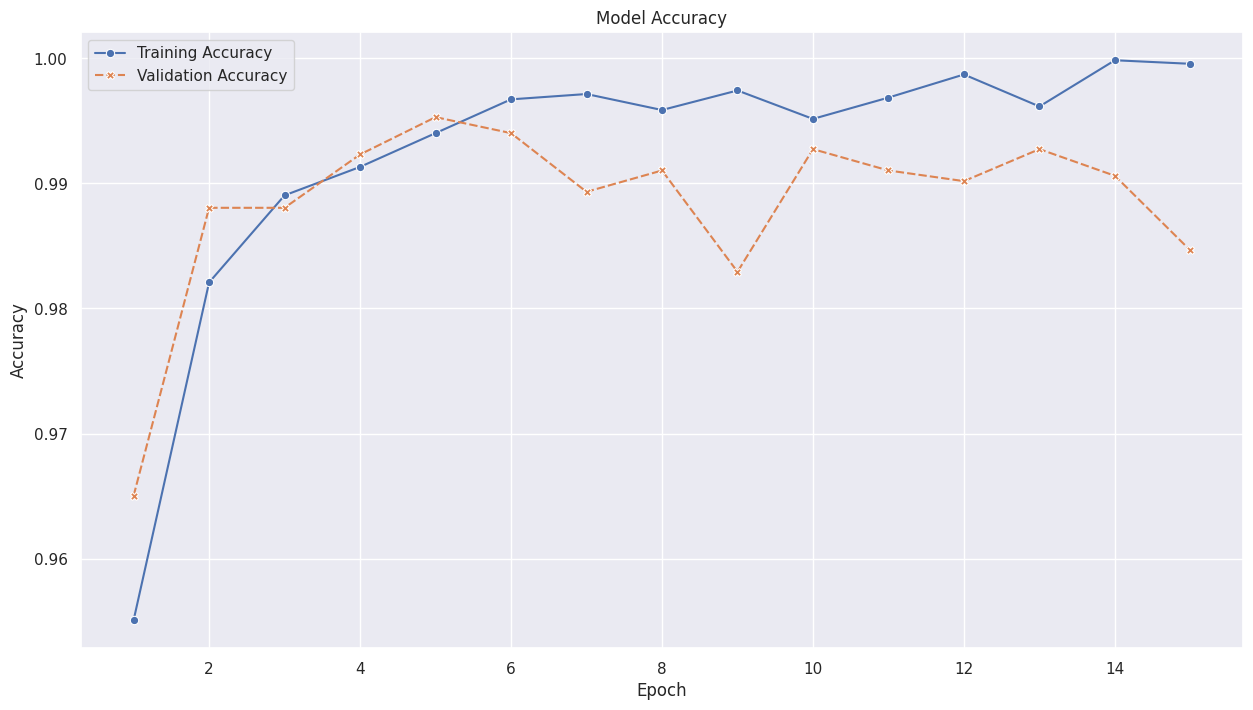

In [32]:
accuracy_plot(history_of_model_2)

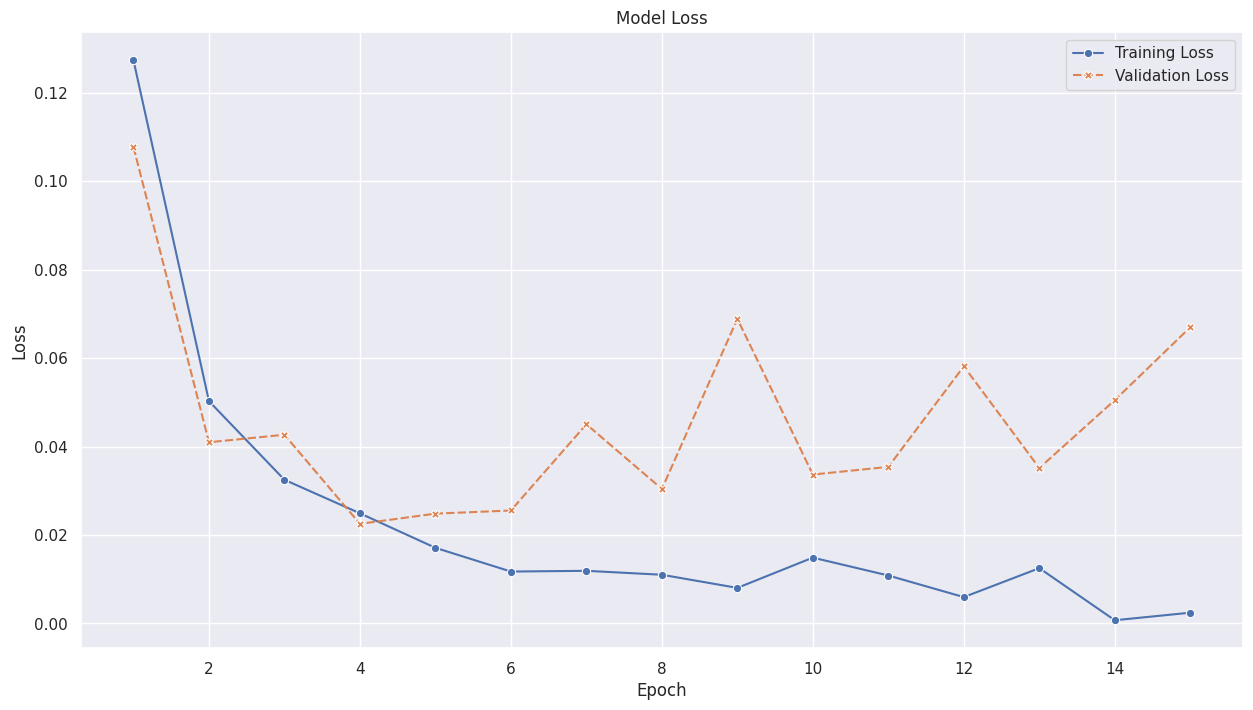

In [33]:
loss_plot(history_of_model_2)


Metrics :


Accuracy  Precision    Recall  F1_Score
Custom Model 1  0.986933   0.987064  0.986986  0.987020
Custom Model 2  0.985973   0.986065  0.986033  0.986041

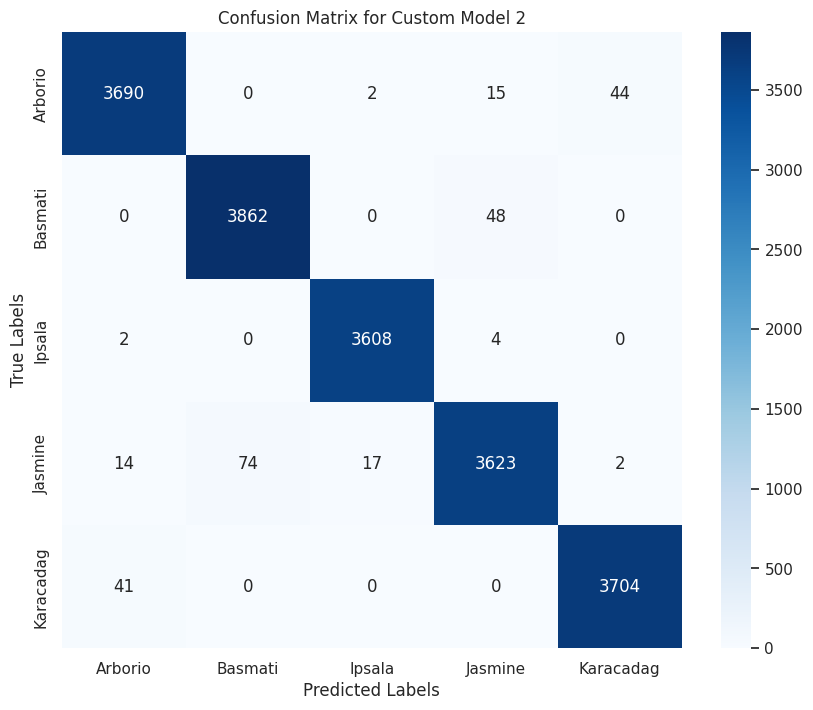

In [34]:
metrics_df = evaluate_model(model2, "Custom Model 2", validation, metrics_df, tpu_strategy)

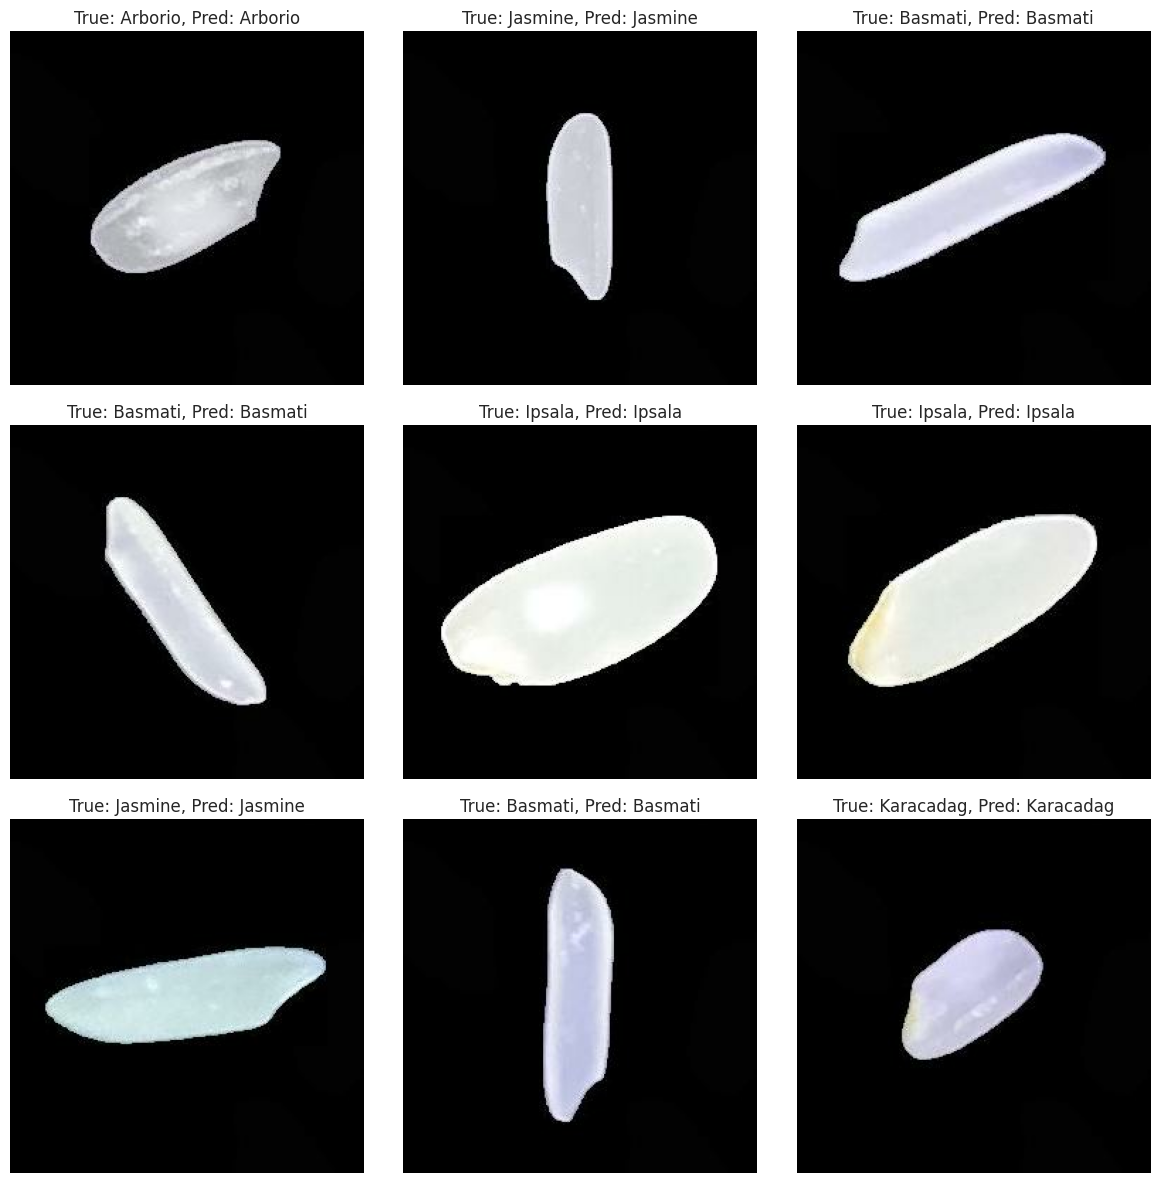

In [35]:
# Get a batch of validation data
x_batch, y_batch = next(iter(validation))

# Make predictions within TPU strategy scope
with tpu_strategy.scope():
    y_pred_batch = model2(x_batch, training=False)

# Convert predictions to label indices
y_pred_labels = np.argmax(y_pred_batch.numpy(), axis=1)
y_true_labels = np.argmax(y_batch.numpy(), axis=1)

# Display sample predictions
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_batch[i].numpy().astype("uint8"))
    
    true_label = validation.class_names[y_true_labels[i]]
    pred_label = validation.class_names[y_pred_labels[i]]
    
    plt.title(f"True: {true_label}, Pred: {pred_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 10px; background-color: #c0e5e9; font-size:115%; text-align:left">

  <font color=navy>
    <p style="color:navy;">
      The second custom model shows significant improvement in terms of both accuracy and generalization, but some challenges remain. Here are the key takeaways:
    </p>
    <ul>
      <li><strong>Improved Performance:</strong> The model starts with a higher training accuracy of 91.4% in the first epoch and rapidly improves, reaching over 99.88% by the final epoch. This indicates that the additional convolutional layer helps capture more complex features from the data.</li>
      <li><strong>High Validation Accuracy:</strong> The validation accuracy remains consistently high, fluctuating around 98-99%, and peaks at 99.31%, demonstrating strong generalization to the validation set.</li>
      <li><strong>Validation Loss Fluctuation:</strong> The validation loss decreases initially but shows slight fluctuations across epochs, with the lowest being 0.0280. The increase in validation loss, especially after epoch 8, may suggest mild overfitting as the model starts to learn the noise in the training data.</li>
      <li><strong>Overfitting Signs:</strong> Although the model achieves impressive accuracy, the slight rise in validation loss compared to the relatively low training loss points towards minor overfitting. This could be addressed by incorporating techniques like dropout or adding regularization.</li>
    </ul>
    <p style="color:navy;">
      Overall, this model outperforms the first one by learning more robust features, but further optimization could help mitigate overfitting and improve generalization even more.
    </p>

  </font>

</div>


In [36]:
# Model parameters

num_classes = 5

input_shape = (250, 250, 3)


with tpu_strategy.scope():
    model3 = keras.Sequential(
    
        [
    
            keras.layers.Input(shape=input_shape),
    
            keras.layers.Rescaling(1./255),
    
            keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
    
            keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
            keras.layers.BatchNormalization(),
    
            keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    
            keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
            keras.layers.Flatten(),
    
            keras.layers.Dense(units = 128, activation = 'relu'),
    
            keras.layers.Dense(units = 32, activation = 'relu'),
    
            keras.layers.Dense(num_classes, activation="softmax"),
    
        ]
    
    )
    model3.compile(

    loss=keras.losses.CategoricalCrossentropy(),

    optimizer=keras.optimizers.Adam(learning_rate=1e-3),

    metrics=[keras.metrics.CategoricalAccuracy(name="accuracy")]

    )

In [37]:
model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 250, 250, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 248, 248, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 124, 124, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 124, 124, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 122, 122, 64)   │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 238144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    30,482,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,564,741 (116.60 MB)

 Trainable params: 30,564,485 (116.59 MB)

 Non-trainable params: 256 (1.00 KB)

In [38]:
tf.keras.utils.plot_model(

    model3,

    show_shapes=True,

    show_dtype=False,

    show_layer_names=False,

    show_layer_activations=True,

    dpi=100

)

You must install pydot (`pip install pydot`) for `plot_model` to work.


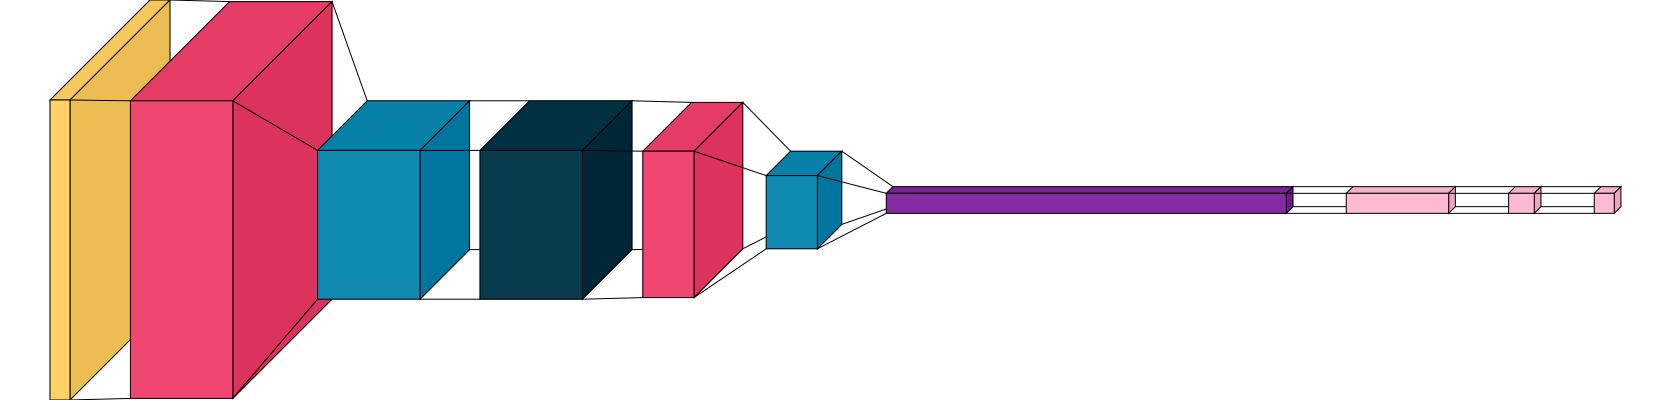

In [39]:
visualkeras.layered_view(

    model3,

    draw_volume=True,

    scale_xy=1.2,

    scale_z=0.8,

    spacing=60,

    padding=50

)

In [40]:
model3.fit(

    train,

    validation_data=validation,

    batch_size=64,

    epochs=15

)

Epoch 1/15


2024-11-14 10:28:15.363365: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node StatefulPartitionedCall.
I0000 00:00:1731580095.648507     908 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(eaab0dcc30656a7c:0:0), session_name()


  3/879 ━━━━━━━━━━━━━━━━━━━━ 37s 43ms/step - accuracy: 0.1111 - loss: 23.1467 

I0000 00:00:1731580100.341265     908 tpu_compile_op_common.cc:245] Compilation of eaab0dcc30656a7c:0:0 with session name  took 4.692416344s and succeeded
I0000 00:00:1731580100.346138     908 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(eaab0dcc30656a7c:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_3614428410502914094", property.function_library_fingerprint = 7751363980041307651, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "8,250,250,3,;8,5,;", property.guaranteed_constants_size = 0, embedding_partitions_fingerprint = "1688352644216761960")
I0000 00:00:1731580100.346166     908 tpu_compilation_cache_interface.cc:541] After adding entry for key ea

879/879 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8606 - loss: 1.6473

I0000 00:00:1731580140.332613     888 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(a9d6f4ad83b7ecb3:0:0), session_name()
I0000 00:00:1731580143.931837     888 tpu_compile_op_common.cc:245] Compilation of a9d6f4ad83b7ecb3:0:0 with session name  took 3.599175626s and succeeded
I0000 00:00:1731580143.933446     888 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(a9d6f4ad83b7ecb3:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_522923092788744357", property.function_library_fingerprint = 8400856435788022911, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "8,250,250,3,;8,5,;", property.guaranteed_constants_size = 0, embeddi

879/879 ━━━━━━━━━━━━━━━━━━━━ 58s 59ms/step - accuracy: 0.8607 - loss: 1.6458 - val_accuracy: 0.9859 - val_loss: 0.0400
Epoch 2/15
879/879 ━━━━━━━━━━━━━━━━━━━━ 48s 54ms/step - accuracy: 0.9835 - loss: 0.0552 - val_accuracy: 0.9893 - val_loss: 0.0304
Epoch 3/15
879/879 ━━━━━━━━━━━━━━━━━━━━ 48s 54ms/step - accuracy: 0.9916 - loss: 0.0238 - val_accuracy: 0.9799 - val_loss: 0.0564
Epoch 4/15
879/879 ━━━━━━━━━━━━━━━━━━━━ 48s 54ms/step - accuracy: 0.9907 - loss: 0.0318 - val_accuracy: 0.9821 - val_loss: 0.0545
Epoch 5/15
879/879 ━━━━━━━━━━━━━━━━━━━━ 48s 54ms/step - accuracy: 0.9954 - loss: 0.0175 - val_accuracy: 0.9821 - val_loss: 0.0485
Epoch 6/15
879/879 ━━━━━━━━━━━━━━━━━━━━ 48s 54ms/step - accuracy: 0.9926 - loss: 0.0223 - val_accuracy: 0.9812 - val_loss: 0.0600
Epoch 7/15
879/879 ━━━━━━━━━━━━━━━━━━━━ 48s 54ms/step - accuracy: 0.9947 - loss: 0.0175 - val_accuracy: 0.9689 - val_loss: 0.0992
Epoch 8/15
879/879 ━━━━━━━━━━━━━━━━━━━━ 49s 54ms/step - accuracy: 0.9909 - loss: 0.0267 - val_accurac

In [41]:
history_of_model_3 = model3.history.history

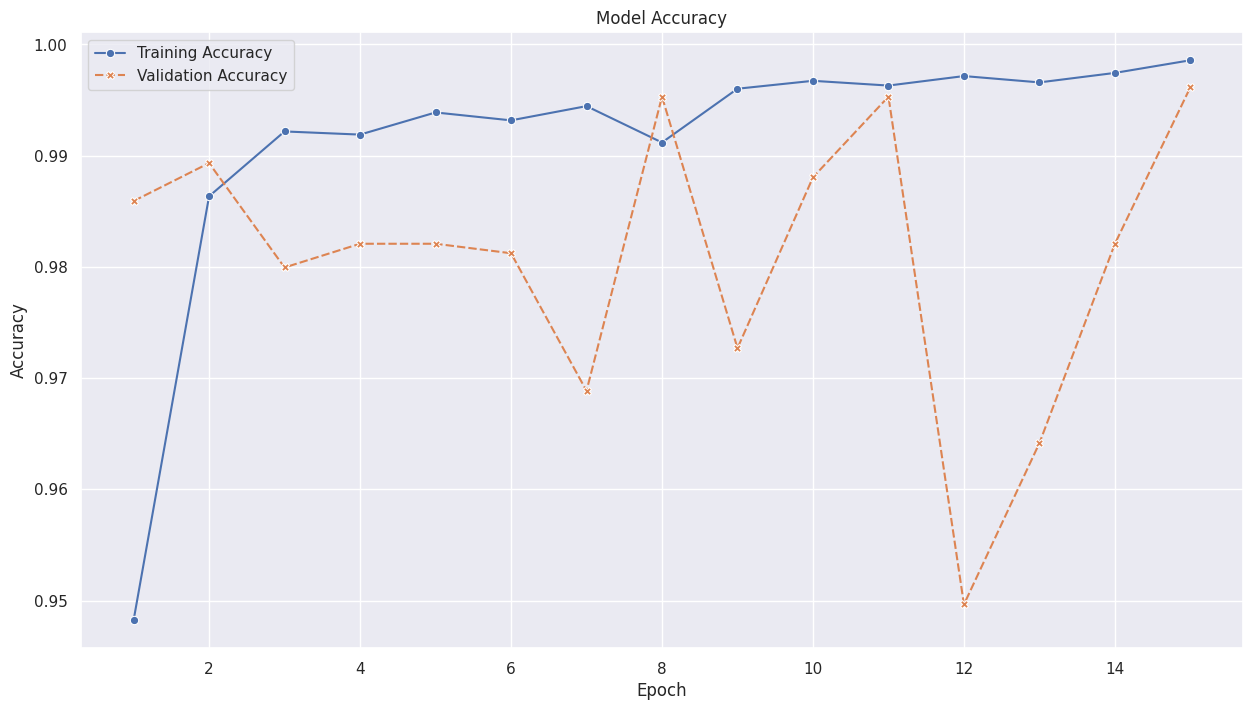

In [42]:
accuracy_plot(history_of_model_3)

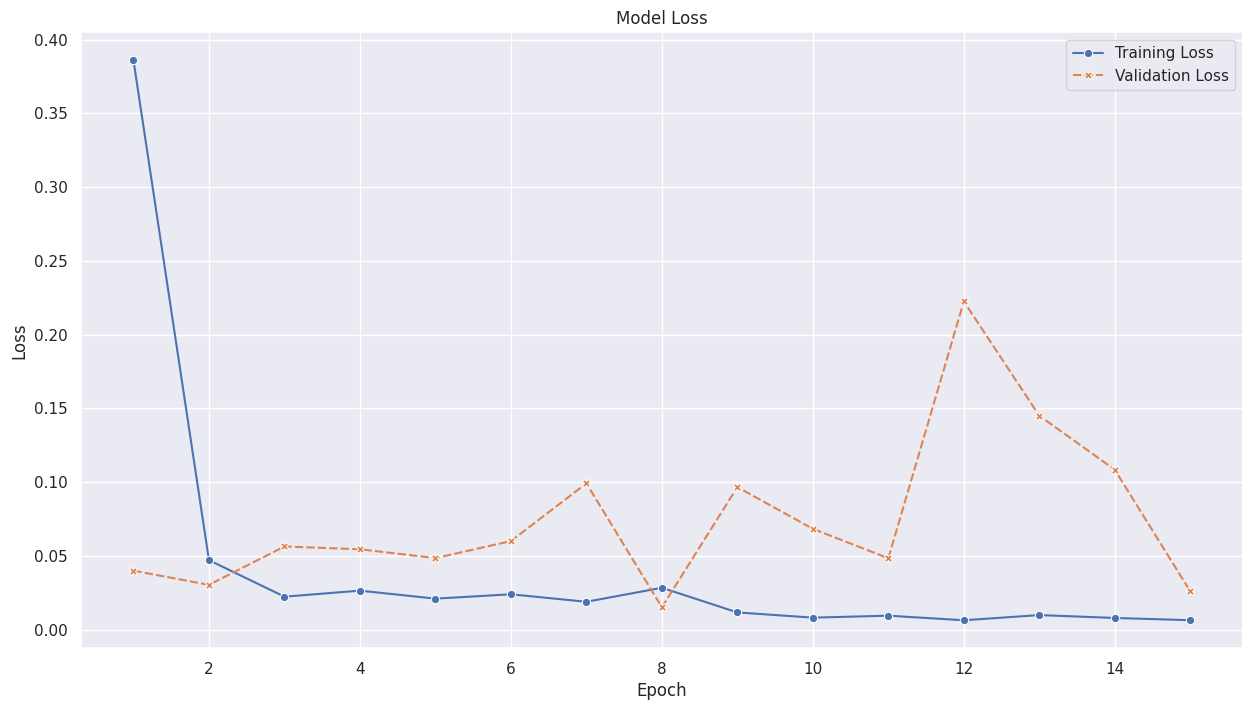

In [43]:
loss_plot(history_of_model_3)


Metrics :


Accuracy  Precision    Recall  F1_Score
Custom Model 1  0.986933   0.987064  0.986986  0.987020
Custom Model 2  0.985973   0.986065  0.986033  0.986041
Custom Model 3  0.994453   0.994501  0.994469  0.994478

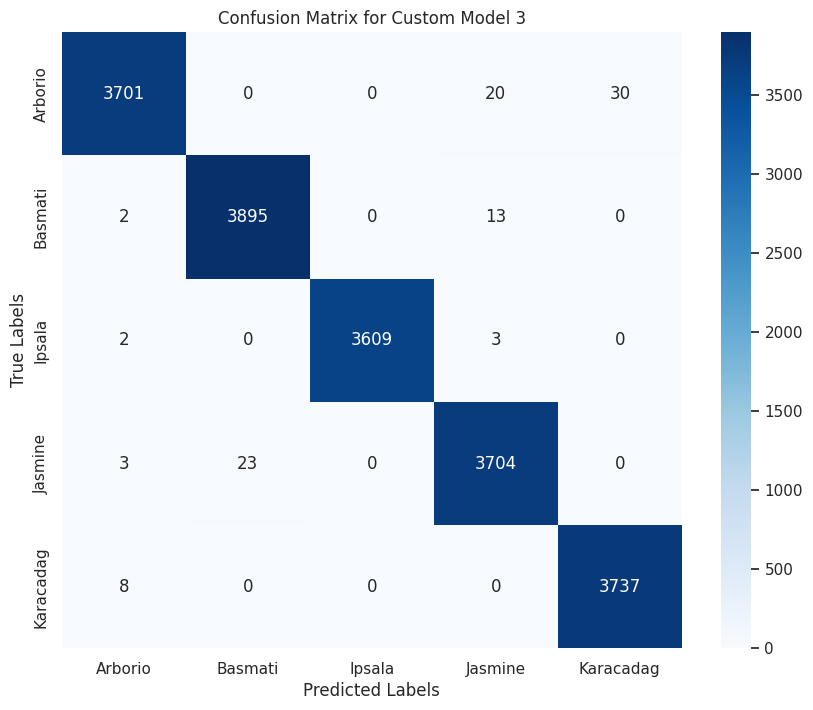

In [44]:
metrics_df = evaluate_model(model3, "Custom Model 3", validation, metrics_df, tpu_strategy)

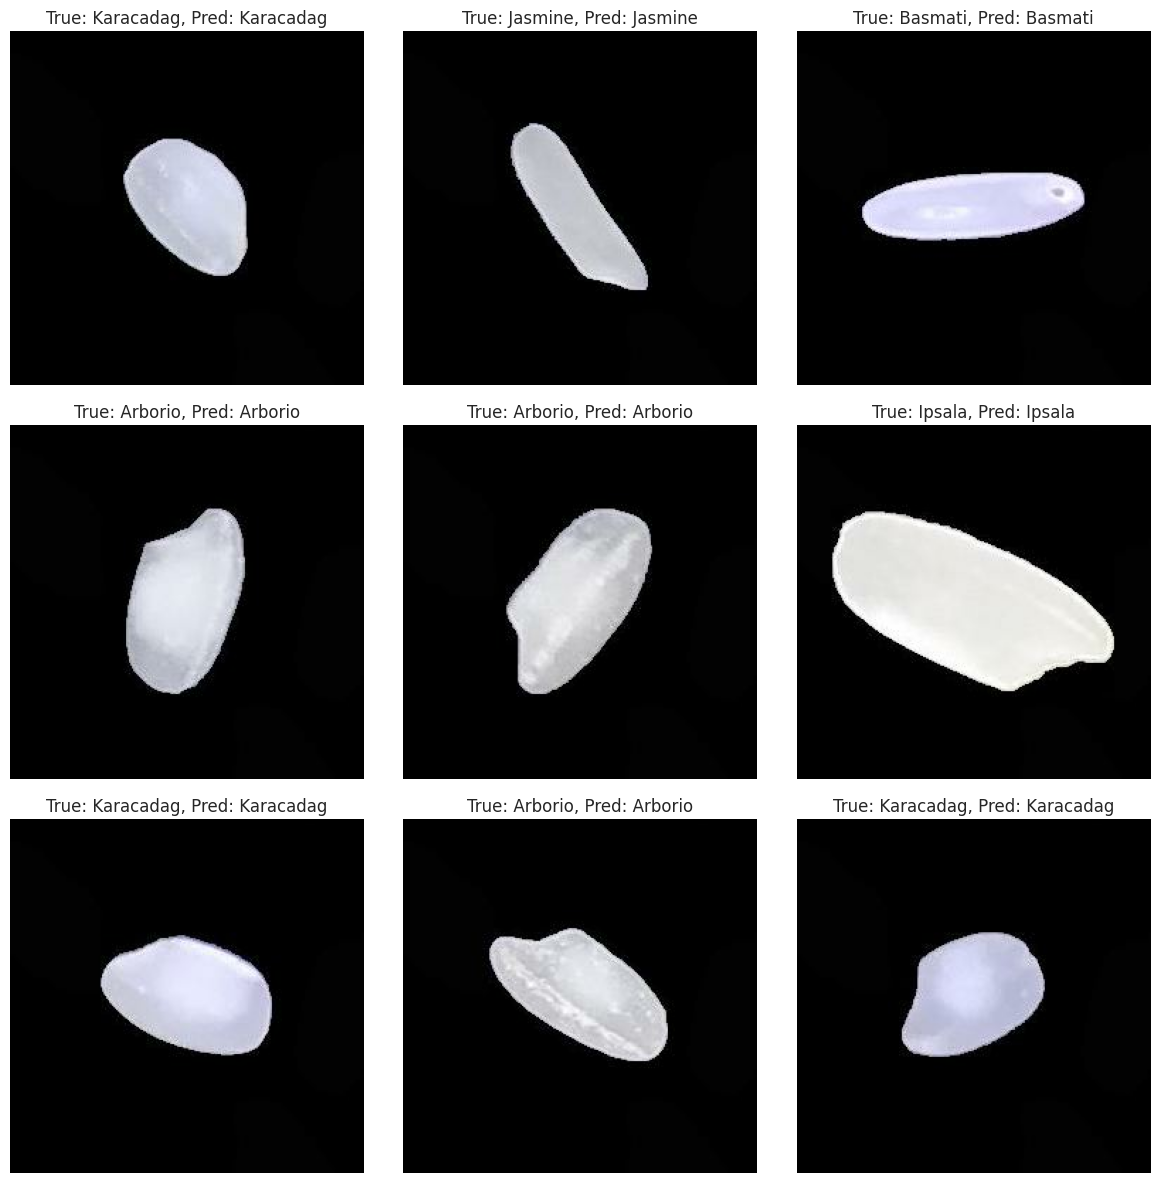

In [45]:
# Get a batch of validation data
x_batch, y_batch = next(iter(validation))

# Make predictions within TPU strategy scope
with tpu_strategy.scope():
    y_pred_batch = model3(x_batch, training=False)

# Convert predictions to label indices
y_pred_labels = np.argmax(y_pred_batch.numpy(), axis=1)
y_true_labels = np.argmax(y_batch.numpy(), axis=1)

# Display sample predictions
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_batch[i].numpy().astype("uint8"))
    
    true_label = validation.class_names[y_true_labels[i]]
    pred_label = validation.class_names[y_pred_labels[i]]
    
    plt.title(f"True: {true_label}, Pred: {pred_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

<a id="Alex"></a>

# <p style="background-color:powderblue; font-family:roboto; color:navy; font-size:145%;font-weight:bold; text-align:center; border-radius:25px 10px; padding: 10px">6 - AlexNet📊</p>



⬆️ [Table of Contents](#c_table)

<div style="border-radius:10px; padding: 10px; background-color: #c0e5e9; font-size:115%; text-align:left">

  <font color=navy>
    <p style="color:navy;">AlexNet is a deep convolutional neural network that was designed for image classification tasks. It consists of five convolutional layers followed by three fully connected layers. The network utilizes ReLU activation functions, max-pooling, and local response normalization layers. It also includes a softmax output layer for multi-class classification. The architecture is known for its use of large convolutional filters and its application in the ImageNet competition, where it significantly reduced the error rate.</p>
  </font>

</div>


In [46]:
# Model parameters

num_classes = 5

input_shape = (250, 250, 3)


with tpu_strategy.scope():
    AlexNet = keras.Sequential(
    
        [
    
            keras.layers.Input(shape=input_shape),
    
            keras.layers.Rescaling(1./255),
    
            keras.layers.Conv2D(96, kernel_size=(11,11), strides= 4,
    
                            padding= 'valid', activation= 'relu',
    
                            kernel_initializer= 'he_normal'),
    
            keras.layers.MaxPooling2D(pool_size=(3,3), strides= (2,2),
    
                                  padding= 'valid', data_format= None),
    
            keras.layers.Conv2D(256, kernel_size=(5,5), strides= 1,
    
                            padding= 'same', activation= 'relu',
    
                            kernel_initializer= 'he_normal'),
    
            keras.layers.MaxPooling2D(pool_size=(3,3), strides= (2,2),
    
                                  padding= 'valid', data_format= None),
    
            keras.layers.Conv2D(384, kernel_size=(3,3), strides= 1,
    
                            padding= 'same', activation= 'relu',
    
                            kernel_initializer= 'he_normal'),
    
            keras.layers.Conv2D(384, kernel_size=(3,3), strides= 1,
    
                            padding= 'same', activation= 'relu',
    
                            kernel_initializer= 'he_normal'),
    
            keras.layers.Conv2D(256, kernel_size=(5,5), strides= 1,
    
                            padding= 'same', activation= 'relu',
    
                            kernel_initializer= 'he_normal'),
    
            keras.layers.Conv2D(256, kernel_size=(3,3), strides= 1,
    
                            padding= 'same', activation= 'relu',
    
                            kernel_initializer= 'he_normal'),
    
            keras.layers.MaxPooling2D(pool_size=(3,3), strides= (2,2),
    
                                  padding= 'valid', data_format= None),
    
            keras.layers.Flatten(),
    
            keras.layers.Dense(units = 4096, activation = 'relu'),
    
            keras.layers.Dense(units = 4096, activation = 'relu'),
    
            keras.layers.Dense(units = 1000, activation = 'relu'),
    
            keras.layers.Dense(num_classes, activation="softmax"),
    
        ]
    
    )
    AlexNet.compile(

    loss=keras.losses.CategoricalCrossentropy(),

    optimizer=keras.optimizers.Adam(learning_rate=1e-3),

    metrics=[keras.metrics.CategoricalAccuracy(name="accuracy")]

)

In [47]:
AlexNet.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)         │ (None, 250, 250, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 29, 29, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 29, 29, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 14, 14, 256)    │     2,457,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 14, 14, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1000)           │     4,097,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 5)              │         5,005 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,546,293 (246.22 MB)

 Trainable params: 64,546,293 (246.22 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
tf.keras.utils.plot_model(

    AlexNet,

    show_shapes=True,

    show_dtype=False,

    show_layer_names=False,

    show_layer_activations=True,

    dpi=100

)

You must install pydot (`pip install pydot`) for `plot_model` to work.


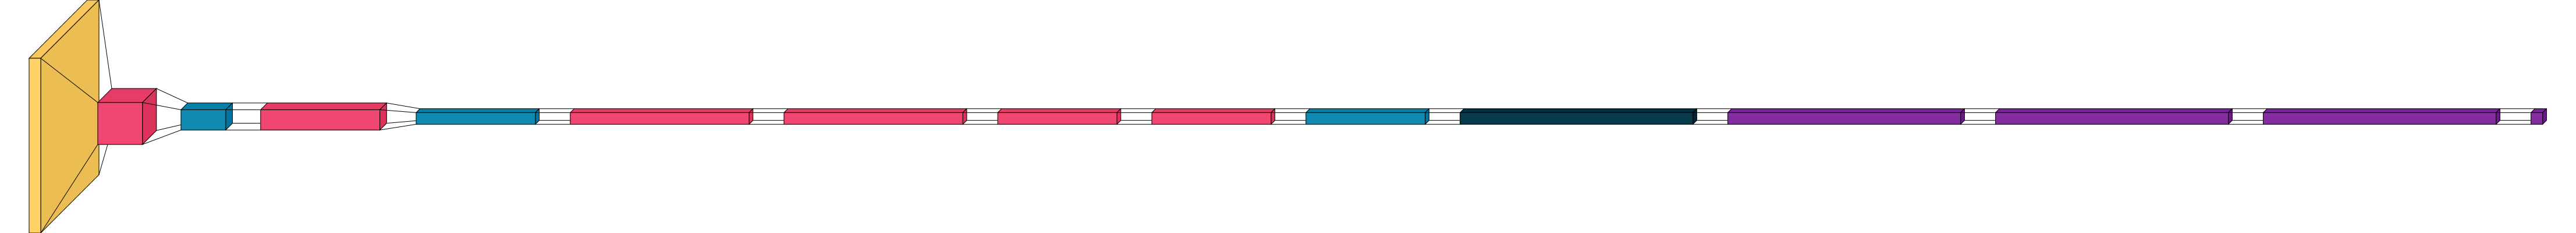

In [49]:
visualkeras.layered_view(

    AlexNet,

    draw_volume=True,

    scale_xy=1.2,

    scale_z=0.8,

    spacing=60,

    padding=50

)

In [50]:
AlexNet.fit(

    train,

    validation_data=validation,

    batch_size=64,

    epochs=15

)

Epoch 1/15


2024-11-14 10:49:22.815008: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node StatefulPartitionedCall.
I0000 00:00:1731581363.157652     923 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(e409bdaa07492edc:0:0), session_name()


  3/879 ━━━━━━━━━━━━━━━━━━━━ 36s 41ms/step - accuracy: 0.2153 - loss: 183.1191

I0000 00:00:1731581369.898122     923 tpu_compile_op_common.cc:245] Compilation of e409bdaa07492edc:0:0 with session name  took 6.740404305s and succeeded
I0000 00:00:1731581369.904980     923 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(e409bdaa07492edc:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_12149566128380921894", property.function_library_fingerprint = 16261898205065008707, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "8,250,250,3,;8,5,;", property.guaranteed_constants_size = 0, embedding_partitions_fingerprint = "1688352644216761960")
I0000 00:00:1731581369.905018     923 tpu_compilation_cache_interface.cc:541] After adding entry for key 

878/879 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8173 - loss: 5.1891

I0000 00:00:1731581406.792526     865 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(26afa17f8472e0b6:0:0), session_name()
I0000 00:00:1731581408.823802     865 tpu_compile_op_common.cc:245] Compilation of 26afa17f8472e0b6:0:0 with session name  took 2.031202535s and succeeded
I0000 00:00:1731581408.826180     865 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(26afa17f8472e0b6:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_14734253837564962187", property.function_library_fingerprint = 2545026333541123751, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "8,250,250,3,;8,5,;", property.guaranteed_constants_size = 0, embed

879/879 ━━━━━━━━━━━━━━━━━━━━ 55s 52ms/step - accuracy: 0.8176 - loss: 5.1795 - val_accuracy: 0.9620 - val_loss: 0.1198
Epoch 2/15
879/879 ━━━━━━━━━━━━━━━━━━━━ 43s 49ms/step - accuracy: 0.9641 - loss: 0.1099 - val_accuracy: 0.9770 - val_loss: 0.0718
Epoch 3/15
879/879 ━━━━━━━━━━━━━━━━━━━━ 43s 49ms/step - accuracy: 0.9756 - loss: 0.0814 - val_accuracy: 0.9889 - val_loss: 0.0400
Epoch 4/15
879/879 ━━━━━━━━━━━━━━━━━━━━ 44s 49ms/step - accuracy: 0.9804 - loss: 0.0647 - val_accuracy: 0.9846 - val_loss: 0.0541
Epoch 5/15
879/879 ━━━━━━━━━━━━━━━━━━━━ 44s 50ms/step - accuracy: 0.9842 - loss: 0.0537 - val_accuracy: 0.9791 - val_loss: 0.0653
Epoch 6/15
879/879 ━━━━━━━━━━━━━━━━━━━━ 44s 49ms/step - accuracy: 0.9866 - loss: 0.0448 - val_accuracy: 0.9936 - val_loss: 0.0320
Epoch 7/15
879/879 ━━━━━━━━━━━━━━━━━━━━ 44s 49ms/step - accuracy: 0.9623 - loss: 0.1084 - val_accuracy: 0.9774 - val_loss: 0.0718
Epoch 8/15
879/879 ━━━━━━━━━━━━━━━━━━━━ 44s 49ms/step - accuracy: 0.9775 - loss: 0.0718 - val_accurac

In [51]:
history_of_AlexNet = AlexNet.history.history

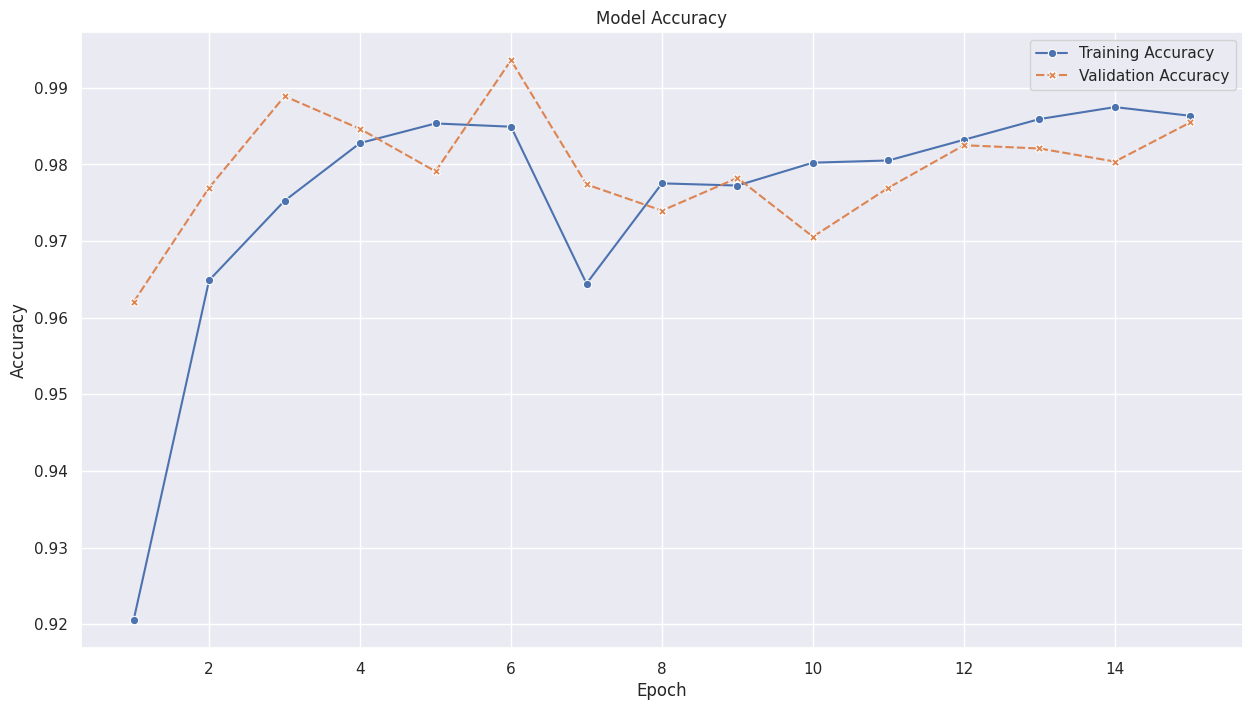

In [52]:
accuracy_plot(history_of_AlexNet)

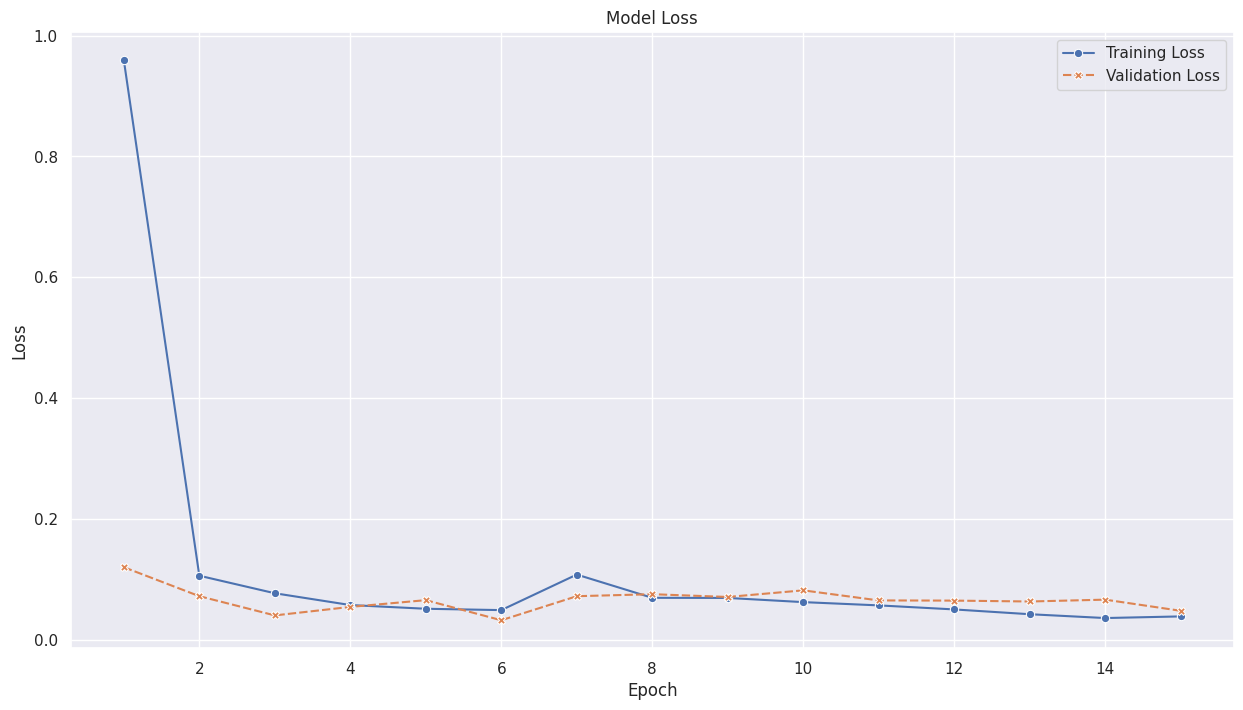

In [53]:
loss_plot(history_of_AlexNet)


Metrics :


Accuracy  Precision    Recall  F1_Score
Custom Model 1  0.986933   0.987064  0.986986  0.987020
Custom Model 2  0.985973   0.986065  0.986033  0.986041
Custom Model 3  0.994453   0.994501  0.994469  0.994478
AlexNet         0.984693   0.984705  0.984799  0.984747

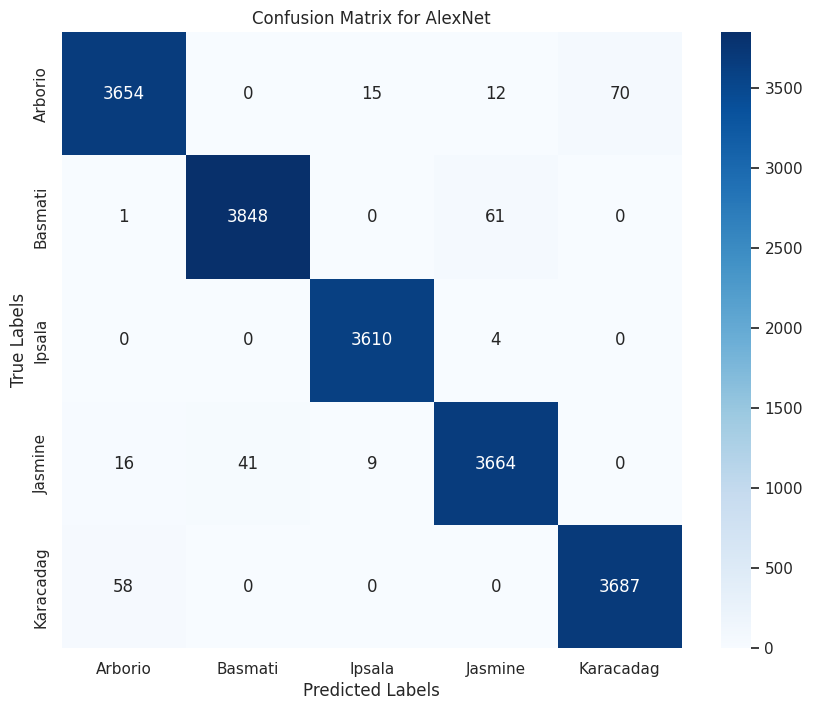

In [54]:
metrics_df = evaluate_model(AlexNet, "AlexNet", validation, metrics_df, tpu_strategy)

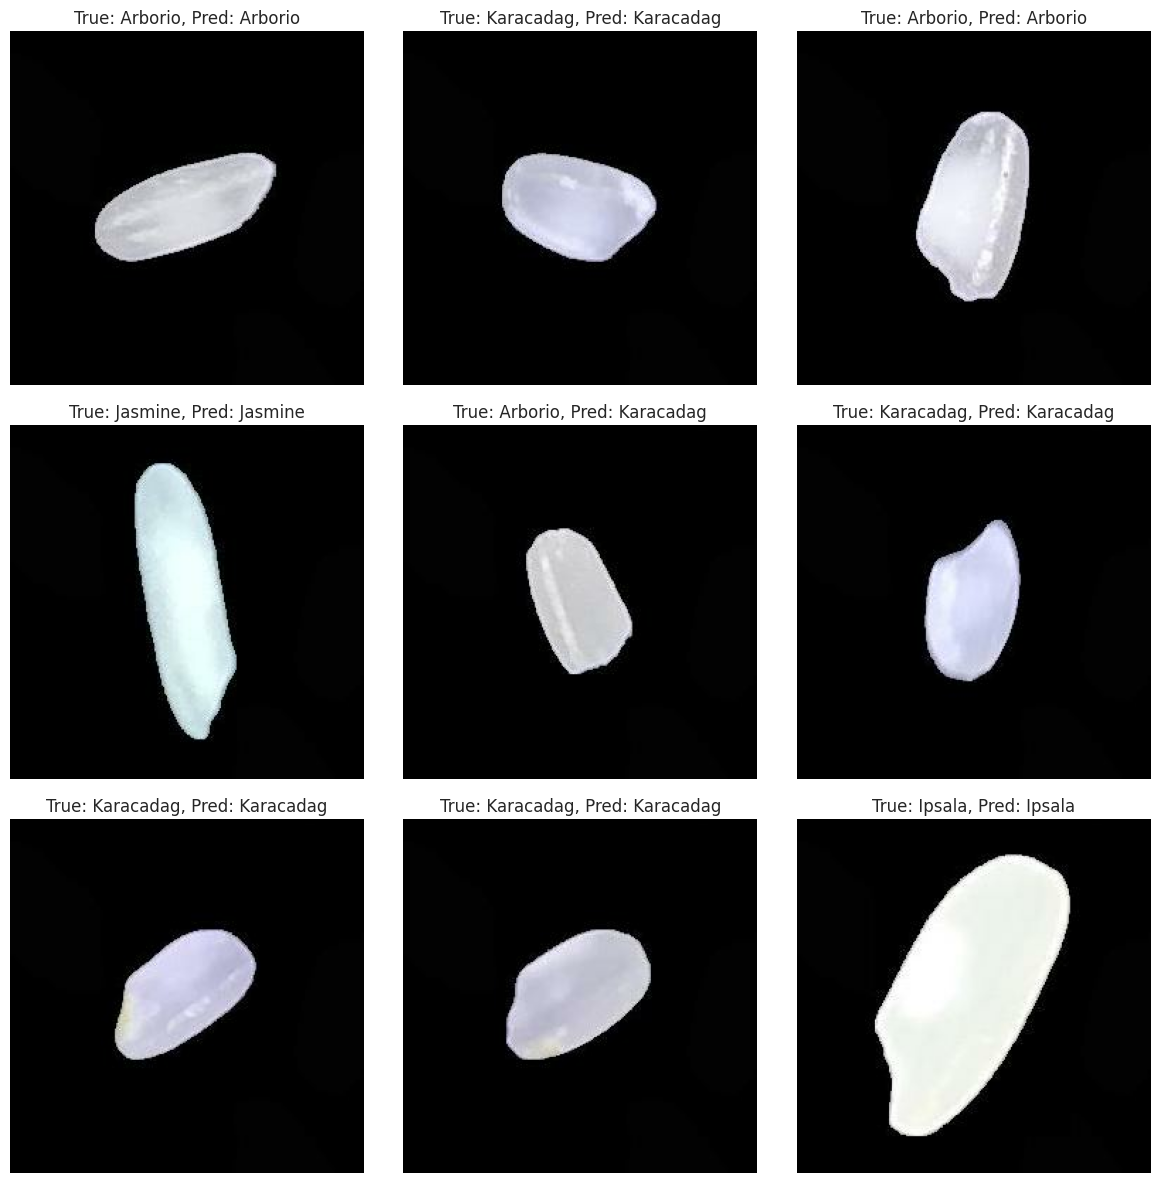

In [55]:
# Get a batch of validation data
x_batch, y_batch = next(iter(validation))

# Make predictions within TPU strategy scope
with tpu_strategy.scope():
    y_pred_batch = AlexNet(x_batch, training=False)

# Convert predictions to label indices
y_pred_labels = np.argmax(y_pred_batch.numpy(), axis=1)
y_true_labels = np.argmax(y_batch.numpy(), axis=1)

# Display sample predictions
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_batch[i].numpy().astype("uint8"))
    
    true_label = validation.class_names[y_true_labels[i]]
    pred_label = validation.class_names[y_pred_labels[i]]
    
    plt.title(f"True: {true_label}, Pred: {pred_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

<a id="result"></a>

# <p style="background-color:powderblue; font-family:roboto; color:navy; font-size:145%;font-weight:bold; text-align:center; border-radius:25px 10px; padding: 10px">7 - Result📊</p>



⬆️ [Table of Contents](#c_table)

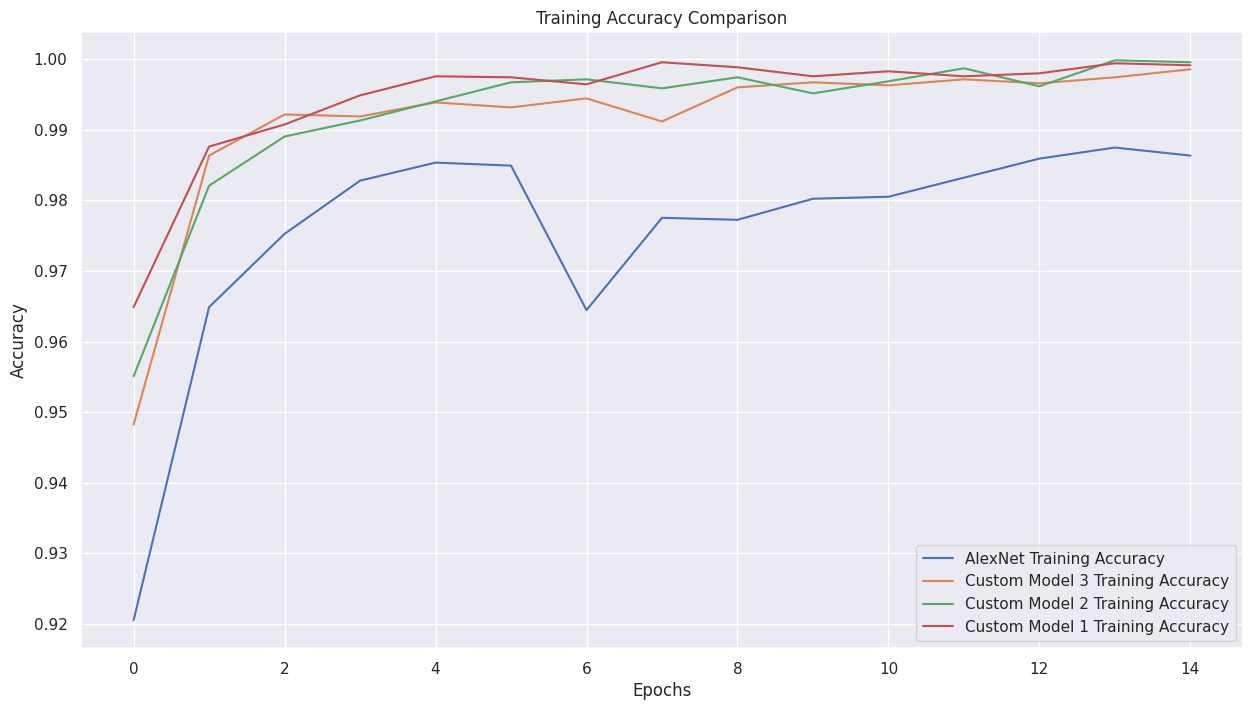

In [56]:
# Define model histories

histories = {

    "AlexNet": history_of_AlexNet,

    "Custom Model 3": history_of_model_3,

    "Custom Model 2": history_of_model_2,

    "Custom Model 1": history_of_model_1,

}



# Plot Accuracy

plt.figure(figsize=(15, 8))

for model_name, history in histories.items():

    plt.plot(history['accuracy'], label=f"{model_name} Training Accuracy")

    

plt.title('Training Accuracy Comparison')

plt.xlabel('Epochs')

plt.ylabel('Accuracy')

plt.legend(loc="lower right")

plt.grid(True)

plt.show()

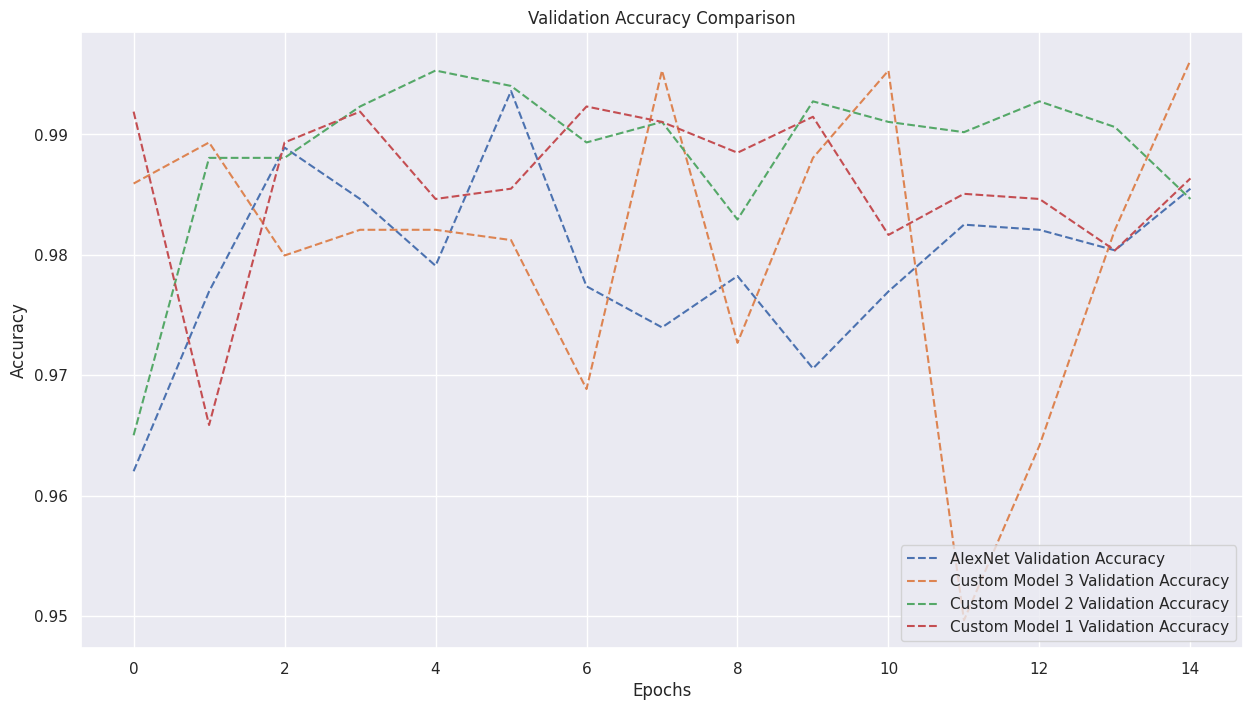

In [57]:
# Plot Accuracy

plt.figure(figsize=(15, 8))

for model_name, history in histories.items():

    plt.plot(history['val_accuracy'], linestyle='--', label=f"{model_name} Validation Accuracy")

    

plt.title('Validation Accuracy Comparison')

plt.xlabel('Epochs')

plt.ylabel('Accuracy')

plt.legend(loc="lower right")

plt.grid(True)

plt.show()

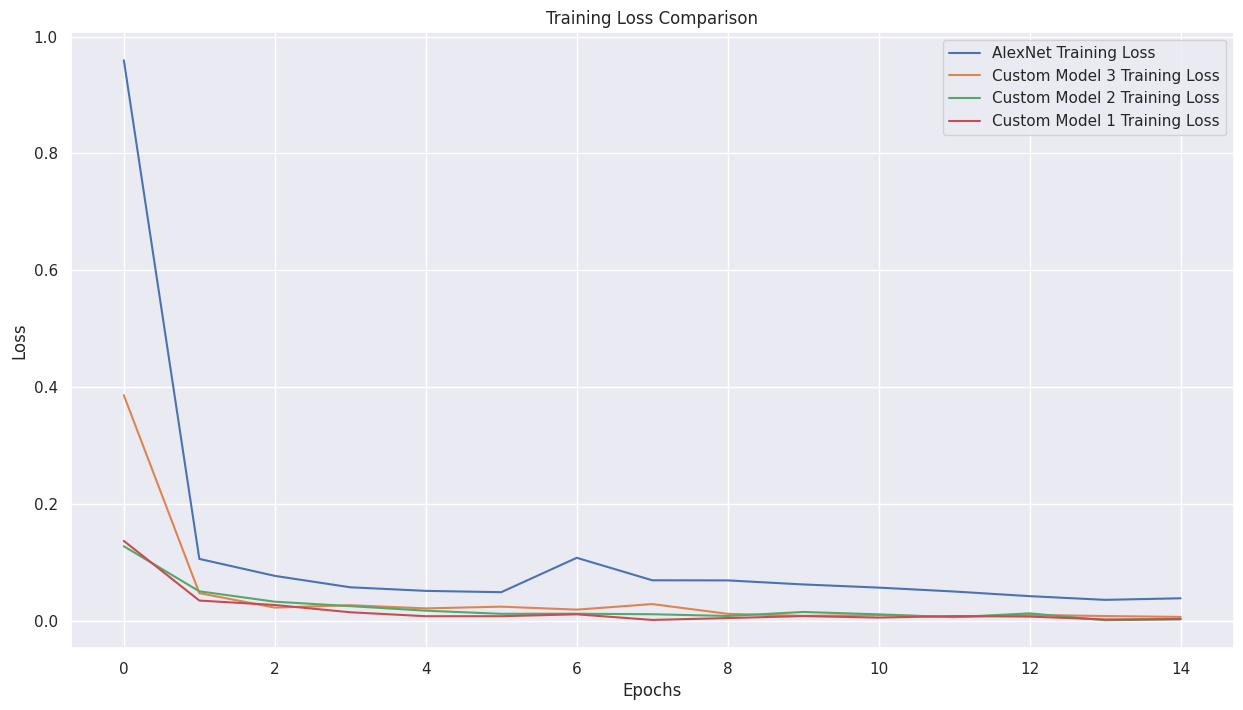

In [58]:
# Plot Loss

plt.figure(figsize=(15, 8))

for model_name, history in histories.items():

    plt.plot(history['loss'], label=f"{model_name} Training Loss")

     

plt.title('Training Loss Comparison')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.legend(loc="upper right")

plt.grid(True)

plt.show()

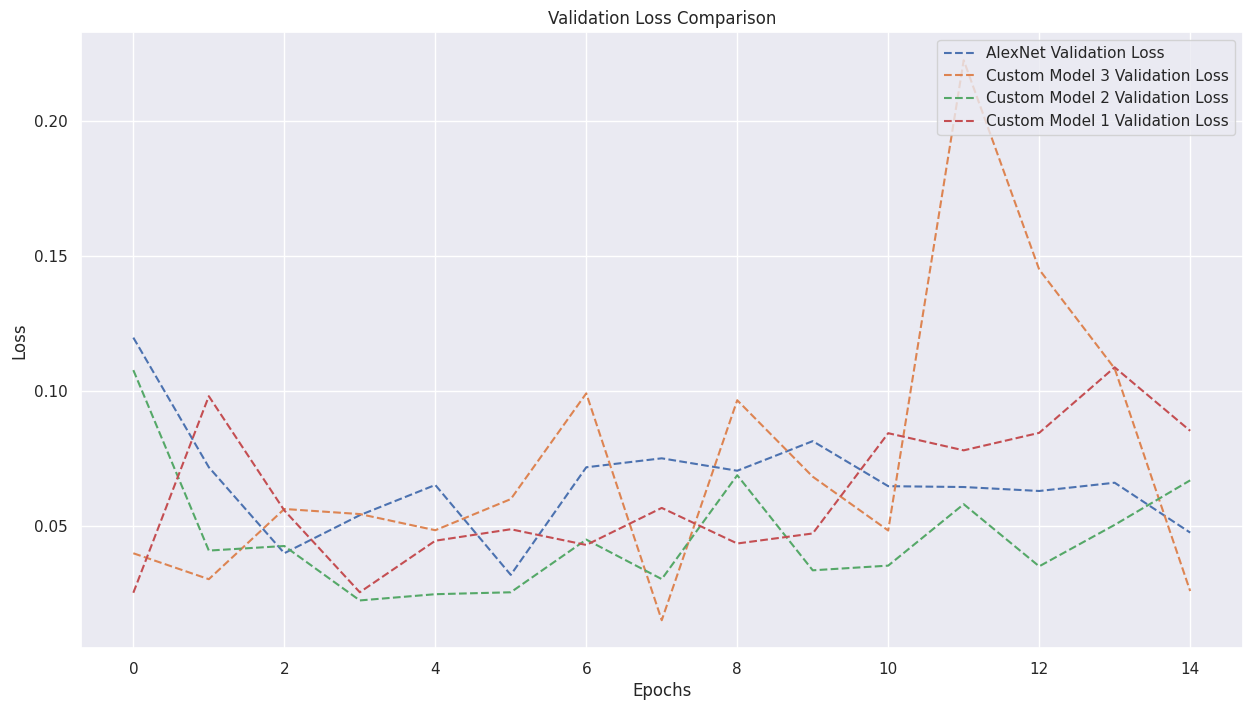

In [59]:
# Plot Loss

plt.figure(figsize=(15, 8))

for model_name, history in histories.items():

    plt.plot(history['val_loss'], linestyle='--', label=f"{model_name} Validation Loss")

    

    

plt.title('Validation Loss Comparison')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.legend(loc="upper right")

plt.grid(True)

plt.show()